### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set_style
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

### Import raw training data 

In [2]:
ames = pd.read_csv('../datasets/train.csv')

[Click for Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

In [3]:
#want to change columns names to lower/snake_case so a little easier to work with
ames.columns = ames.columns.str.lower().str.replace(' ', '_')

In [4]:
#increase pandas default max_rows so I can view all columns at once
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

### First I take a look at shape, info, and summary statistics.

In [5]:
ames.shape #81 columns and 2051 records

(2051, 81)

In [6]:
# There are a lot of columns
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
ames.describe().T

count          mean           std          min          25%  \
id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
pid              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
ms_subclass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
lot_frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
lot_area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
overall_qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
overall_cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
year_built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
year_remod/add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
mas_vnr_area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
bsmtfin_sf_1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
bsmtfin_sf_2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
bsmt_unf_sf      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
total_bsmt_sf    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st_flr_sf       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd_flr_sf       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
low_qual_fin_sf  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
gr_liv_area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
bsmt_full_bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
bsmt_half_bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
full_bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
half_bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
bedroom_abvgr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
kitchen_abvgr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
totrms_abvgrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
garage_yr_blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
garage_cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
garage_area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
wood_deck_sf     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
open_porch_sf    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
enclosed_porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3ssn_porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
screen_porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
pool_area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
misc_val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
mo_sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
yr_sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
id                    1486.0  2.198000e+03       2930.0  
pid              535453200.0  9.071801e+08  924152030.0  
ms_subclass             50.0  7.000000e+01        190.0  
lot_frontage            68.0  8.000000e+01        313.0  
lot_area              9430.0  1.151350e+04     159000.0  
overall_qual             6.0  7.000000e+00         10.0  
overall_cond             5.0  6.000000e+00          9.0  
year_built            1974.0  2.001000e+03       2010.0  
year_remod/add        1993.0  2.004000e+03       2010.0  
mas_vnr_area             0.0  1.610000e+02       1600.0  
bsmtfin_sf_1           368.0  7.337500e+02       5644.0  
bsmtfin_sf_2             0.0  0.000000e+00       1474.0  
bsmt_unf_sf            

### Now, deeper dive into variables with nulls 


**Columns with nulls to start on:** | Column 2
---|---
lot_frontage|bsmt_full_bath
alley|bsmt_half_bath
mas_vnr_type|fireplace_qu
mas_vnr_area|garage_type
bsmt_qual|garage_yr_blt
bsmt_cond|garage_finish
bsmt_exposure|garage_cars
bsmtfin_type_1|garage_area
bsmtfin_sf_1|garage_qual
bsmtfin_type_2|garage_cond
bsmtfin_sf_2|pool_qc
bsmt_unf_sf|fence
total_bsmt_sf|misc_feature

In [8]:
#Investigate nulls
ames.isnull().sum()[0:90]

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

#### Lot Frontage 

In [9]:
ames['lot_frontage'].value_counts().head() #Linear feet of street connected to property

60.0    179
70.0     96
80.0     94
50.0     90
65.0     71
Name: lot_frontage, dtype: int64

In [10]:
lot_nulls = ames[ames['lot_frontage'].isna()] #lots with no linear feet of street connected to property
# These appear to be real properties. Setting to average for the corrosponding type of lot_config.
lot_nulls.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0    109  533352170           60        RL           NaN     13517   Pave   
7    145  535154050           20        RL           NaN     12160   Pave   
8   1942  535353130           20        RL           NaN     15783   Pave   
23    12  527165230           20        RL           NaN      7980   Pave   
27  1534  909277040           50        RL           NaN     11700   Pave   

   alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0    NaN       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
7    NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
8    NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
23   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
27  Grvl       IR1          HLS    AllPub     Inside        Mod      Crawfor   

   condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0         RRAe        Norm      1Fam      2Story             6             8   
7         Norm        Norm      1Fam      1Story             5             5   
8       Artery        Norm      1Fam      1Story             5             5   
23        Norm        Norm      1Fam      1Story             6             7   
27        Norm        Norm      1Fam      1.5Fin             5             6   

    year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0         1976            2005      Gable   CompShg      HdBoard      Plywood   
7         1959            1959        Hip   CompShg      Plywood      Plywood   
8         1952            1952      Gable   CompShg      Wd Sdng      Wd Sdng   
23        1992            2007      Gable   CompShg      HdBoard      HdBoard   
27        1937            1995      Gable   CompShg      WdShing      Wd Shng   

   mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0       BrkFace         289.0         Gd         TA     CBlock        TA   
7       BrkFace         180.0         TA         TA     CBlock        TA   
8          None           0.0         TA         TA     CBlock        TA   
23         None           0.0         TA         Gd      PConc        Gd   
27         None           0.0         TA         TA     CBlock        TA   

   bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0         TA            No            GLQ         533.0            Unf   
7         TA            No            Rec        1000.0            Unf   
8         TA            No            Rec         292.0            Unf   
23        TA            No            ALQ         935.0            Unf   
27        TA            No            BLQ         606.0            Unf   

    bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0            0.0        192.0          725.0    GasA         Ex           Y   
7            0.0        188.0         1188.0    GasA         Fa           Y   
8            0.0        632.0          924.0    GasA         TA           Y   
23           0.0        233.0         1168.0    GasA         Ex           Y   
27           0.0        336.0          942.0    GasA         Ex           Y   

   electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0       SBrkr         725         754                0         1479   
7       SBrkr        1188           0                0         1188   
8       SBrkr         924           0                0          924   
23      SBrkr        1187           0                0         1187   
27      SBrkr        1265         673                0         1938   

    bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0              0.0             0.0          2          1              3   
7              1.0             0.0          1          0              3   
8              0.0             0.0          1          0         

In [11]:
grouped_lots = ames.groupby(['lot_config']).agg({
   'lot_frontage' : 'mean', 
})
grouped_lots

lot_frontage
lot_config              
Corner         83.245552
CulDSac        55.228571
FR2            60.836735
FR3            87.000000
Inside         66.952780

In [12]:
ames[ames['lot_frontage'].isna()].head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0    109  533352170           60        RL           NaN     13517   Pave   
7    145  535154050           20        RL           NaN     12160   Pave   
8   1942  535353130           20        RL           NaN     15783   Pave   
23    12  527165230           20        RL           NaN      7980   Pave   
27  1534  909277040           50        RL           NaN     11700   Pave   

   alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0    NaN       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
7    NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
8    NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
23   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
27  Grvl       IR1          HLS    AllPub     Inside        Mod      Crawfor   

   condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0         RRAe        Norm      1Fam      2Story             6             8   
7         Norm        Norm      1Fam      1Story             5             5   
8       Artery        Norm      1Fam      1Story             5             5   
23        Norm        Norm      1Fam      1Story             6             7   
27        Norm        Norm      1Fam      1.5Fin             5             6   

    year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0         1976            2005      Gable   CompShg      HdBoard      Plywood   
7         1959            1959        Hip   CompShg      Plywood      Plywood   
8         1952            1952      Gable   CompShg      Wd Sdng      Wd Sdng   
23        1992            2007      Gable   CompShg      HdBoard      HdBoard   
27        1937            1995      Gable   CompShg      WdShing      Wd Shng   

   mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0       BrkFace         289.0         Gd         TA     CBlock        TA   
7       BrkFace         180.0         TA         TA     CBlock        TA   
8          None           0.0         TA         TA     CBlock        TA   
23         None           0.0         TA         Gd      PConc        Gd   
27         None           0.0         TA         TA     CBlock        TA   

   bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0         TA            No            GLQ         533.0            Unf   
7         TA            No            Rec        1000.0            Unf   
8         TA            No            Rec         292.0            Unf   
23        TA            No            ALQ         935.0            Unf   
27        TA            No            BLQ         606.0            Unf   

    bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0            0.0        192.0          725.0    GasA         Ex           Y   
7            0.0        188.0         1188.0    GasA         Fa           Y   
8            0.0        632.0          924.0    GasA         TA           Y   
23           0.0        233.0         1168.0    GasA         Ex           Y   
27           0.0        336.0          942.0    GasA         Ex           Y   

   electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0       SBrkr         725         754                0         1479   
7       SBrkr        1188           0                0         1188   
8       SBrkr         924           0                0          924   
23      SBrkr        1187           0                0         1187   
27      SBrkr        1265         673                0         1938   

    bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0              0.0             0.0          2          1              3   
7              1.0             0.0          1          0              3   
8              0.0             0.0          1          0         

In [13]:
#replace np.nan with average for lot_config of that type
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'Corner'), 'lot_frontage'] = 83.25
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'CulDSac'), 'lot_frontage'] = 54.734375        
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'FR2'), 'lot_frontage'] = 60.836735        
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'FR3'), 'lot_frontage'] = 87.000000        
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'Inside'), 'lot_frontage'] = 66.759571        

In [14]:
ames['lot_frontage'].isna().sum()

0

In [15]:
# looking at outliers
ames['lot_frontage'].sort_values().tail()

1263    174.0
441     195.0
1875    200.0
960     313.0
1335    313.0
Name: lot_frontage, dtype: float64

In [16]:
x_frontage_maybe_drop = ames[ames['lot_frontage'] == 313]
x_frontage_maybe_drop

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1335  1266  535427070           20        RL         313.0     27650   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
960    NaN       IR3          Bnk    AllPub     Corner        Gtl   
1335   NaN       IR2          HLS    AllPub     Inside        Mod   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
960       Edwards       Feedr        Norm      1Fam      2Story            10   
1335        NAmes        PosA        Norm      1Fam      1Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1335             7        1960            2007       Flat   Tar&Grv   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
960        Stucco       Stucco        Stone         796.0         Ex   
1335      Wd Sdng      Wd Sdng         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
960          TA      PConc        Ex        TA            Gd            GLQ   
1335         TA     CBlock        Gd        TA            Gd            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
960         5644.0            Unf           0.0        466.0         6110.0   
1335         425.0            Unf           0.0        160.0          585.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
960     GasA         Ex           Y      SBrkr        4692         950   
1335    GasA         Ex           Y      SBrkr        2069           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
960                 0         5642             2.0             0.0          2   
1335                0         2069             1.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
960           1              3              1           Ex             12   
1335          0              4              1           Gd              9   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
960         Typ           3           Gd      Attchd         2008.0   
1335        Typ           1           Gd      Attchd         1960.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
960            Fin          2.0       1418.0          TA          TA   
1335           RFn          2.0        505.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
960            Y           214            292               0           0   
1335           Y             0              0               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
960              0        480      Gd   NaN          NaN         0        1   
1335             0          0     NaN   NaN          NaN         0       11   

      yr_sold sale_type  saleprice  
960      2008       New     160000  
1335     2008       WD      242000

#### Alley

In [17]:
ames['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [18]:
ames['alley'].isnull().sum()

1911

In [19]:
#should be NA according to datadictionary if no alley. Will make this change. This will have to be dummyfied later. 
#I am not sure how different a gravel/paved alley will be. May be best to dummy by 1 = has alley of any sort, 0= no alley.

In [20]:
ames['alley'] = ames['alley'].replace('male', '1') 

In [21]:
#using .apply lambda
#ames.alley = ames.alley.apply(lambda alley: 'NA' if alley == np.nan else str(alley))

#why does this only work after I convert to string? Question for office hours.

In [22]:
ames['alley'].value_counts()

NA      1911
Grvl      85
Pave      55
Name: alley, dtype: int64

#### mas_vnr_type & mas_vnr_area.
#### Masonry veneer type and area

In [23]:
print(ames['mas_vnr_type'].value_counts())
print(ames['mas_vnr_area'].value_counts())

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64
0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: mas_vnr_area, Length: 373, dtype: int64


In [24]:
ames['mas_vnr_type'].head()

0    BrkFace
1    BrkFace
2       None
3       None
4       None
Name: mas_vnr_type, dtype: object

In [25]:
ames[ames['mas_vnr_type'].isna()].head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22   2393  528142010           60        RL         103.0     12867   Pave   
41   2383  528110050           20        RL         107.0     13891   Pave   
86    539  531371050           20        RL          67.0     10083   Pave   
212   518  528458020           20        FV          90.0      7993   Pave   
276  2824  908130020           20        RL          75.0      8050   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
22     NA       IR1          Lvl    AllPub     Corner        Gtl      NridgHt   
41     NA       Reg          Lvl    AllPub     Inside        Gtl      NridgHt   
86     NA       Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
212    NA       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
276    NA       Reg          Lvl    AllPub     Inside        Gtl      Edwards   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
22         Norm        Norm      1Fam      2Story             8             5   
41         Norm        Norm      1Fam      1Story            10             5   
86         Norm        Norm      1Fam      1Story             7             5   
212        Norm        Norm      1Fam      1Story             7             5   
276        Norm        Norm      1Fam      1Story             6             5   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
22         2005            2006      Gable   CompShg      CemntBd   
41         2006            2006      Gable   CompShg      VinylSd   
86         2003            2003      Gable   CompShg      VinylSd   
212        2008            2009      Gable   CompShg      VinylSd   
276        2002            2002      Gable   CompShg      VinylSd   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
22       CmentBd          NaN           NaN         Gd         TA      PConc   
41       VinylSd          NaN           NaN         Ex         TA      PConc   
86       VinylSd          NaN           NaN         Gd         TA      PConc   
212      VinylSd          NaN           NaN         Gd         TA      PConc   
276      VinylSd          NaN           NaN         TA         TA      PConc   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
22         Ex        TA            Av            Unf           0.0   
41         Ex        Gd            Gd            GLQ        1386.0   
86         Gd        TA            No            GLQ         833.0   
212        Ex        TA            No            Unf           0.0   
276        Gd        TA            Av            GLQ         475.0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
22             Unf           0.0       1209.0         1209.0    GasA   
41             Unf           0.0        690.0         2076.0    GasA   
86             Unf           0.0        343.0         1176.0    GasA   
212            Unf           0.0       1436.0         1436.0    GasA   
276            ALQ         297.0        142.0          914.0    GasA   

    heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
22          Ex           Y      SBrkr        1209        1044   
41          Ex           Y      SBrkr        2076           0   
86          Ex           Y      SBrkr        1200           0   
212         Ex           Y      SBrkr        1436           0   
276         Ex           Y      SBrkr         914           0   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
22                 0         2253             0.0             0.0          2   
41                 0         2076             1.0             0.0          2   
86                 0         1200             1.0             0.0          2   
212                0         1436             0.0             0.0          2   
276                0   

In [26]:
ames['mas_vnr_type'] = ames['mas_vnr_type'].replace(np.nan, 'None') #replace masonry np.nan with None
ames['mas_vnr_area'] = ames['mas_vnr_area'].replace(np.nan, 0) #replace masonry np.nan with 0

#### Basement related:  
* bsmt_qual (Evaluates the height of the basement), 
* bsmt_cond (Evaluates the general condition of the basement), 
* bsmt_exposure (Refers to walkout or garden level walls)
* bsmtfin_type_1
* bsmtfin_sf_1
* bsmtfin_type_2
* bsmtfin_sf_2
* bsmt_unf_sf
* total_bsmt_sf
* bsmt_full_bath
* bsmt_half_bath

In [27]:
ames['bsmt_qual'].value_counts() #missing NA for no basement

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [28]:
ames[['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf','bsmt_full_bath',
       'bsmt_half_bath']].isnull().sum()

bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [29]:
#these all receive an NA if no basement
basement_to_na = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 
       'bsmtfin_type_2']

#these receive 0sqft if basement is NA
basement_to_zero = ['bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmtfin_sf_1', 'bsmt_full_bath',
       'bsmt_half_bath']

for i in basement_to_na:
    ames[i] = ames[i].replace(np.nan, 'NA') 

In [30]:
ames[ames['bsmtfin_sf_1'].isna()] #the missing records are for NA basement properties. Setting to sqft value to zero.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1327  1342  903230120           20        RM          99.0      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1327    NA       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1327         TA      PConc        NA        NA            NA             NA   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1327           NaN             NA           NaN          NaN            NaN   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

In [31]:
#set basement sqft to 0 IF basement is NA, else drop as incomplete basement data and only 1 null record for each    
for i in basement_to_zero:
    ames[i] = ames[i].replace(np.nan, 0) 

#### fireplace_qu

In [32]:
ames['fireplace_qu'].isnull().sum()

1000

In [33]:
len(ames['fireplace_qu'])

2051

In [34]:
ames['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [35]:
ames['fireplaces'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [36]:
len(ames[(ames['fireplace_qu'].isna()) & (ames['fireplaces'] < 1)]) #number of houses w/o fireplace = fireplace_qu np.nan!

1000

In [37]:
ames['fireplace_qu'] = ames['fireplace_qu'].replace(np.nan, 'NA') #NA for 'No Fireplace'

In [38]:
ames['fireplace_qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

#### Garage related:
* garage_type
* garage_yr_blt
* garage_finish
* garage_cars
* garage_area
* garage_qual
* garage_cond


In [39]:
ames[['garage_type','garage_finish','garage_qual','garage_cond']].isnull().sum()

garage_type      113
garage_finish    114
garage_qual      114
garage_cond      114
dtype: int64

In [40]:
#create two lists, one for catagorical and one for numeric

garage_to_na = ['garage_type','garage_finish','garage_qual','garage_cond']
garage_to_0 = ['garage_yr_blt','garage_cars', 'garage_area']

for i in garage_to_na:
    ames[i] = ames[i].replace(np.nan, 'NA') 

In [41]:
ames[['garage_yr_blt','garage_cars', 'garage_area']].isnull().sum()

garage_yr_blt    114
garage_cars        1
garage_area        1
dtype: int64

In [42]:
ames[(ames['garage_yr_blt'].isna()) & (ames['garage_type'] =='NA')] #113 rows, whats up with the missing 1 to make 114?

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
28    2243  911103060          190   C (all)     75.000000      8250   Pave   
53     330  923226250          160        RM     21.000000      1476   Pave   
65    2278  923202134           20        RL     70.000000      8402   Pave   
79    2235  910201050           50        RM     50.000000      7288   Pave   
101   2084  905476170           30        RL     58.000000      9098   Pave   
103    728  902477130           30   C (all)     72.000000      9392   Pave   
114    781  905228050           20        RL     83.250000      9000   Pave   
120   1492  908127120           30        RL     63.000000     13907   Pave   
134   1514  909100170           30        RL     67.000000      5604   Pave   
136    216  905101100           50        RL     54.000000      6342   Pave   
139    204  903426200           70        RM     60.000000     12900   Pave   
162    754  903430070           90        RM     50.000000      3000   Pave   
235    698  902105060           70        RM     90.000000      9900   Pave   
256   2745  905477010           20        RL     77.000000      8335   Pave   
260    131  534451150           30        RL     55.000000      5350   Pave   
264    615  534450150           30        RL     50.000000      5330   Pave   
276   2824  908130020           20        RL     75.000000      8050   Pave   
334   2846  909131125          190        RH     66.759571      7082   Pave   
356    943  911103050           50   C (all)    105.000000      8470   Pave   
382    753  903430060           75        RM     92.000000      5520   Pave   
406   2369  527451200          160        RM     21.000000      1680   Pave   
409   2034  903454010           70        RM     60.000000      6882   Pave   
426   2882  911175440          190   C (all)     50.000000      9000   Pave   
437   1501  908201100           90        RL     65.000000      6040   Pave   
445   2635  535478110          190        RL     70.000000      7000   Pave   
457   1951  535379110           70        RL     60.000000     10800   Pave   
486   1318  902328040           75        RM     35.000000      6300   Pave   
530    900  908275040           90        RL     65.000000     10926   Pave   
542   1376  904351280          190        RL     62.000000     10106   Pave   
555   1366  903458110           50        RM     66.759571      7920   Pave   
562    187  902401060          190        RM    100.000000      9045   Pave   
579    218  905101310           90        RL     72.000000     10778   Pave   
580   1504  908204160           90        RL     74.000000      6845   Pave   
612   2670  902456015           50   C (all)     63.000000      4761   Pave   
636   2174  908127100           90        RL     81.000000     11841   Grvl   
653   1417  905480150           50        RL     60.000000      9600   Pave   
663   2187  908225310           90        RL     52.000000      8741   Pave   
689   1415  905477050          190        RL     70.000000      7000   Pave   
692   2883  911225110           50   C (all)     60.000000      8520   Grvl   
700    207  903454060          190        RM     70.000000      5600   Pave   
705   1292  902109080          190        RM     63.000000     11426   Pave   
708   2875  910203100           30        RM     61.000000      8534   Pave   
722   1135  531375050           20        RL     63.000000     13072   Pave   
736    172  902106130           30        RM     56.000000      4485   Pave   
741   2471  531363080           20        RL     74.000000      7733   Pave   
783   2621  535450180           50        RL     60.000000     10800   Pave   
787   1600  923228080          160        RM     21.000000      1477   Pave   
791    763  904301060           90        RL     60.000000     10800   Pave   
814   1515  909101060           30        RL     45.000000      8248   Pave   
822   1516  909101180          190        RL     55.000000

In [43]:
ames[ames['garage_cars'].isna()] #it has a garage type, but no more infor. I'm going to set this value to zero.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1712  2237  910201180           70        RM          50.0      9060   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1712    NA       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1712       IDOTRR        Norm        Norm      1Fam      2Story             5   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1712             6        1923            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1712      Wd Sdng      Plywood         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1712         TA     BrkTil        Gd        TA            No            ALQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1712         548.0            Unf           0.0        311.0          859.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1712    GasA         Ex           Y      SBrkr         942         886   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1712                0         1828             0.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1712          0              3              1           Gd              6   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1712        Typ           0           NA      Detchd            NaN   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1712            NA          NaN          NaN          NA          NA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1712           Y           174              0             212           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1712             0          0     NaN  MnPrv          NaN         0        3   

      yr_sold sale_type  saleprice  
1712     2007       WD      150909

In [44]:
for i in garage_to_0:
    ames[i] = ames[i].replace(np.nan, 0) 

In [45]:
ames[['garage_type','garage_finish','garage_qual','garage_cond','garage_yr_blt','garage_cars', 'garage_area']].isnull().sum()

garage_type      0
garage_finish    0
garage_qual      0
garage_cond      0
garage_yr_blt    0
garage_cars      0
garage_area      0
dtype: int64

#### pool_qc

In [46]:
ames['pool_qc'].isnull().sum() #mostly empty column. There are only 2051 records.

2042

In [47]:
ames['pool_qc'].unique() #almost no information on pool. Going to set to a default 'TA' for average/typical IF pool YES.
#Will probably end up dropping this column. May be important if pool YES/NO, but less so for pool quality. 

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [48]:
ames['pool_area'].isnull().sum()

0

In [49]:
ames['pool_area'].value_counts() #good grief. Do they not have pools in Ames?

0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: pool_area, dtype: int64

In [50]:
for i in ames[(ames['pool_qc'].isna()) & (ames['pool_area'] == 0)]:
    ames['pool_qc'] = ames['pool_qc'].replace(np.nan, 'NA')     

In [51]:
ames['pool_qc'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

#### fence

In [52]:
ames['fence'].isnull().sum()

1651

In [53]:
ames['fence'] = ames['fence'].replace(np.nan, 'NA') 

In [54]:
ames['fence'].isnull().sum()

0

#### misc_feature

In [55]:
ames['misc_feature'].isnull().sum() #not surprise most do not have a 'Tennis court' or 'Elevator' on their property...

1986

In [56]:
for i in ames[(ames['misc_feature'].isna()) & (ames['misc_val'] == 0)]:
    ames['misc_feature'] = ames['misc_feature'].replace(np.nan, 'NA')  

In [57]:
ames['misc_feature'].isnull().sum()

0

### Final Null Check

In [58]:
ames.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

## Check datatypes against data dictionary

In [59]:
#let's break this into bite-sized chunks

In [60]:
ames.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

### Lists grouped by type of column for reference and to help organize data.

In [61]:
ames_indexing = [['id', 'pid']]

In [62]:
#ordinal data. 
#Will want to convert these to numeric lists. #Note:'overall_qual','overall_cond' are already numeric
ames_ordinal = ames[['saleprice','lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']]

In [63]:
ames_nominal = ames[['ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1',
       'condition_2','bldg_type','house_style','roof_style','roof_matl', 'exterior_1st', 'exterior_2nd','mas_vnr_type',
        'foundation','heating','central_air','garage_type','misc_feature','sale_type'     
]]

In [64]:
ames_catagorical = ames[['street','alley', 'lot_shape', 'land_contour','utilities',
       'lot_config', 'land_slope', 'neighborhood','condition_1',
       'condition_2', 'bldg_type','house_style','roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type','exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating', 'heating_qc', 'central_air', 'electrical',
                    'kitchen_qual','functional','fireplace_qu','garage_type','garage_finish','garage_qual',
       'garage_cond', 'paved_drive','pool_qc','fence', 'misc_feature','sale_type'          
                   ]]

In [65]:
ames_numeric_catagory = ames[['saleprice','ms_subclass', 'ms_zoning', 'overall_qual',
       'overall_cond','mo_sold'                       
                        ]]

In [66]:
ames_numeric = ames[['saleprice','lot_frontage', 'lot_area','year_built', 'year_remod/add','mas_vnr_area','bsmtfin_sf_2', 'bsmt_unf_sf', 
                'total_bsmt_sf','1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars', 'garage_area','wood_deck_sf', 'open_porch_sf',
       'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area','misc_val','yr_sold'                              
               ]]

In [67]:
y = ames['saleprice']

In [68]:
ames_catagorical.dtypes #expect object dtypes

street            object
alley             object
lot_shape         object
land_contour      object
utilities         object
lot_config        object
land_slope        object
neighborhood      object
condition_1       object
condition_2       object
bldg_type         object
house_style       object
roof_style        object
roof_matl         object
exterior_1st      object
exterior_2nd      object
mas_vnr_type      object
exter_qual        object
exter_cond        object
foundation        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating           object
heating_qc        object
central_air       object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_type       object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
fence             object
misc_feature      object


In [69]:
ames_numeric_catagory.dtypes #didn't expect that object in ms_zoning

saleprice        int64
ms_subclass      int64
ms_zoning       object
overall_qual     int64
overall_cond     int64
mo_sold          int64
dtype: object

In [70]:
ames_numeric.dtypes 

saleprice            int64
lot_frontage       float64
lot_area             int64
year_built           int64
year_remod/add       int64
mas_vnr_area       float64
bsmtfin_sf_2       float64
bsmt_unf_sf        float64
total_bsmt_sf      float64
1st_flr_sf           int64
2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
totrms_abvgrd        int64
fireplaces           int64
garage_yr_blt      float64
garage_cars        float64
garage_area        float64
wood_deck_sf         int64
open_porch_sf        int64
enclosed_porch       int64
3ssn_porch           int64
screen_porch         int64
pool_area            int64
misc_val             int64
yr_sold              int64
dtype: object

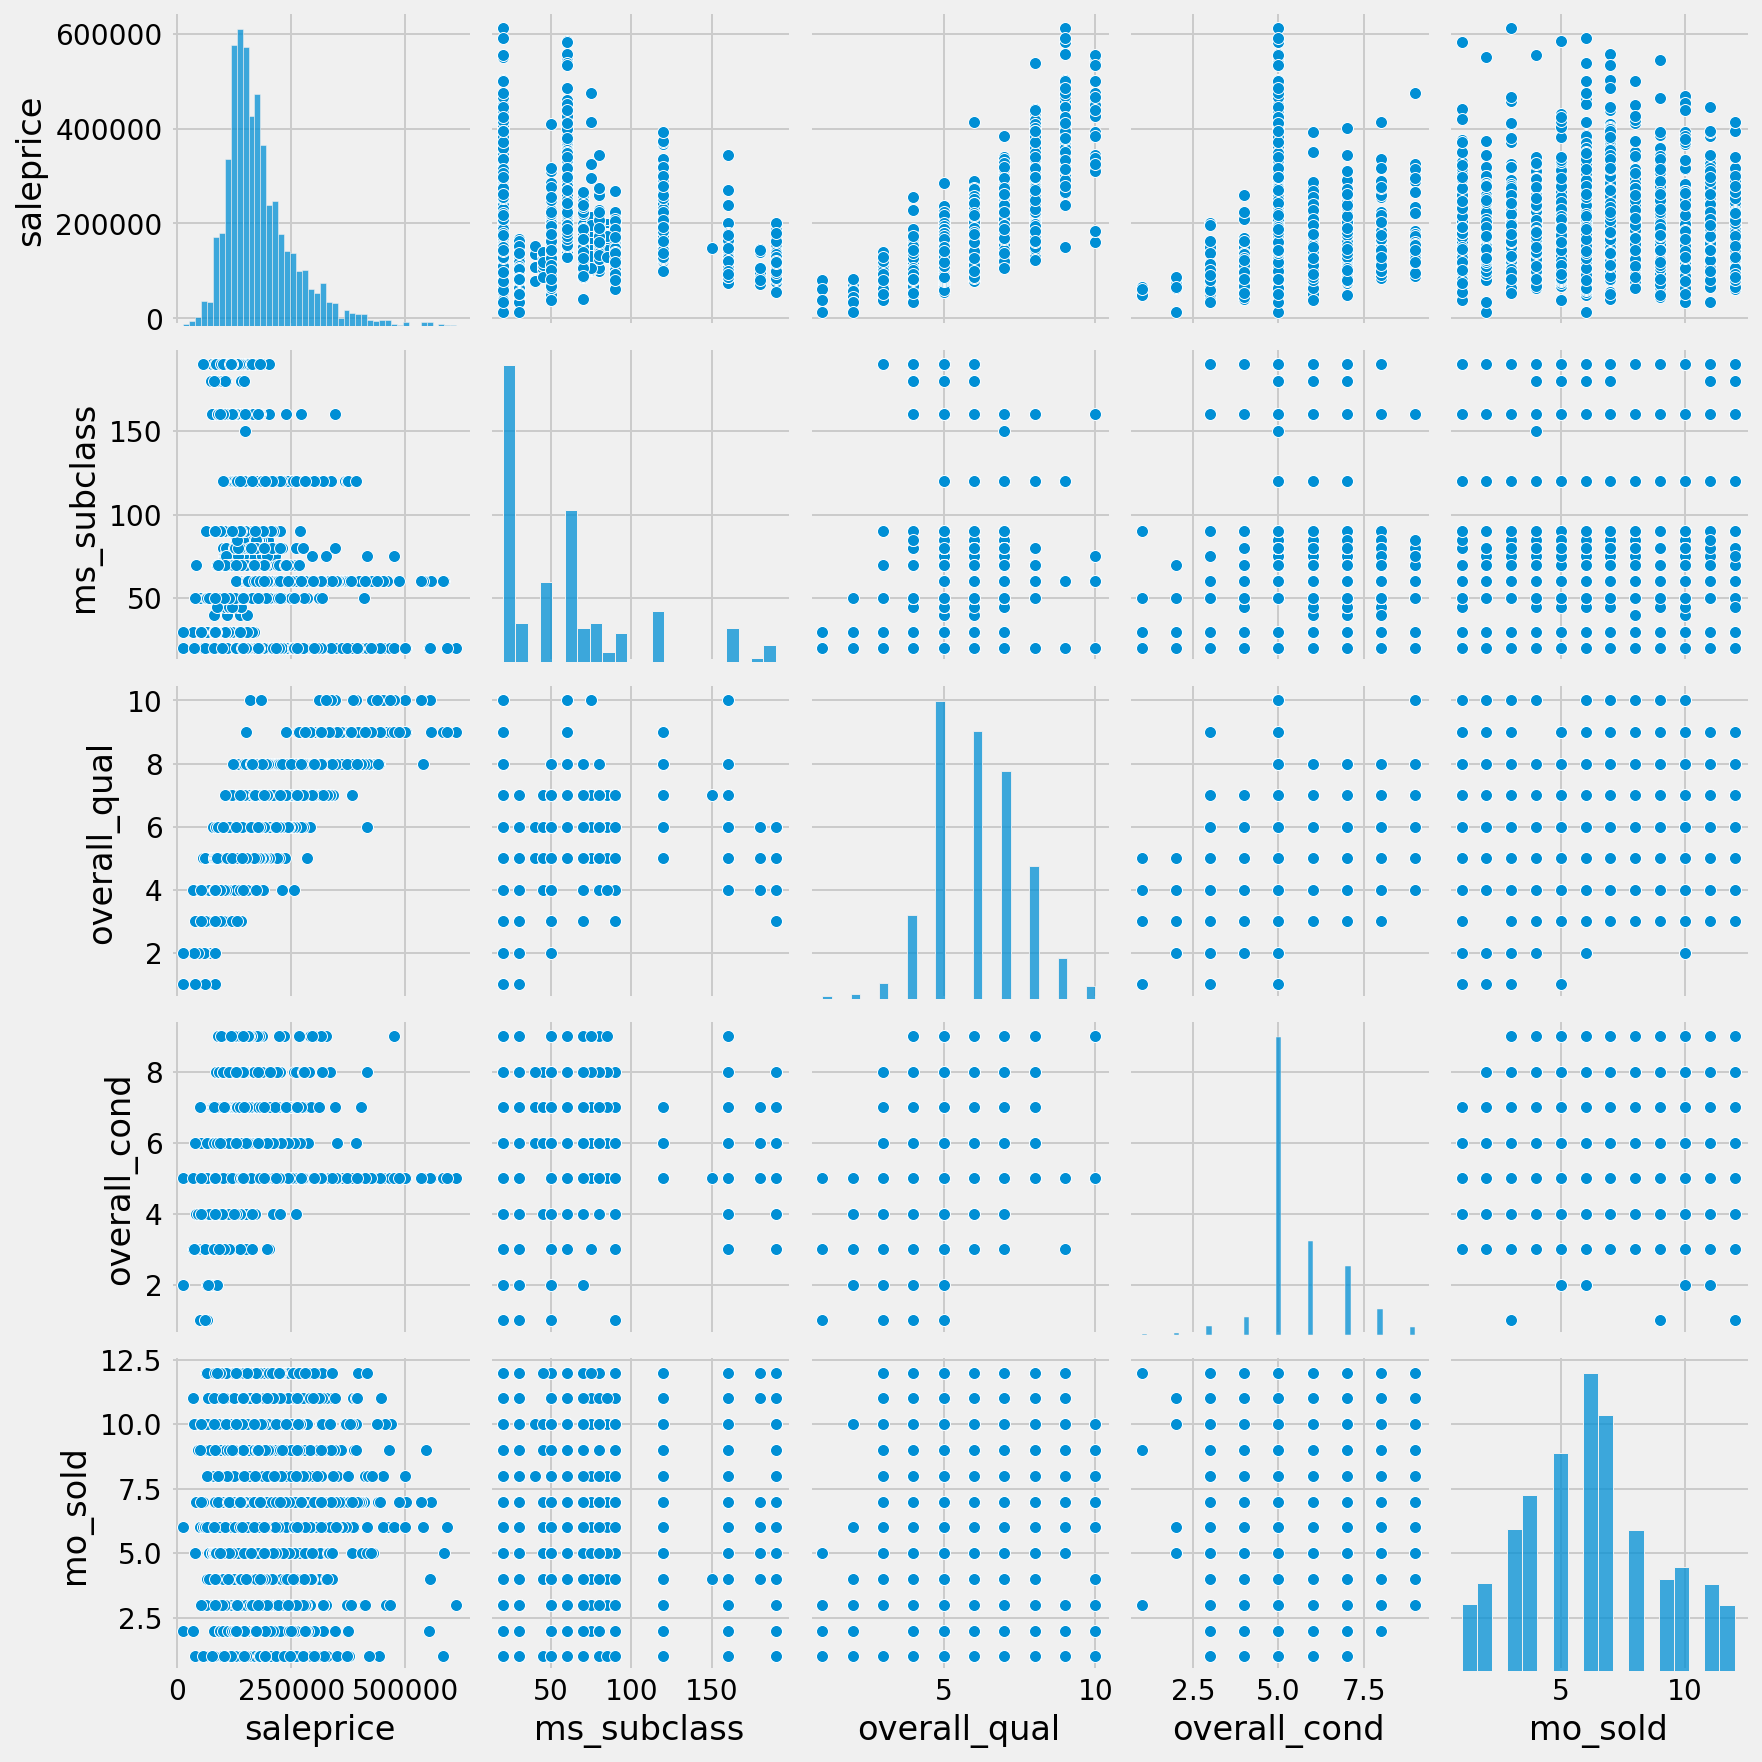

In [71]:
sns.pairplot(ames_numeric_catagory) #initial eda on numeric features

#### Ordinal Data Transformations
##### These can easily be turned into numbers. Then I will examine plots of variables to decide which features to check in the model. There will also be many opportunities to explore interactions between certain features.

In [72]:
#ordinal columns
ames_ordinal.head()

saleprice lot_shape utilities land_slope  overall_qual  overall_cond  \
0     130500       IR1    AllPub        Gtl             6             8   
1     220000       IR1    AllPub        Gtl             7             5   
2     109000       Reg    AllPub        Gtl             5             7   
3     174000       Reg    AllPub        Gtl             5             5   
4     138500       IR1    AllPub        Gtl             6             8   

  exter_qual exter_cond bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
0         Gd         TA        TA        TA            No            GLQ   
1         Gd         TA        Gd        TA            No            GLQ   
2         TA         Gd        TA        TA            No            GLQ   
3         TA         TA        Gd        TA            No            Unf   
4         TA         TA        Fa        Gd            No            Unf   

  bsmtfin_type_2 heating_qc electrical kitchen_qual functional fireplace_qu  \
0            Unf         Ex      SBrkr           Gd        Typ           NA   
1            Unf         Ex      SBrkr           Gd        Typ           TA   
2            Unf         TA      SBrkr           Gd        Typ           NA   
3            Unf         Gd      SBrkr           TA        Typ           NA   
4            Unf         TA      SBrkr           TA        Typ           NA   

  garage_finish garage_qual garage_cond paved_drive pool_qc fence  
0           RFn          TA          TA           Y      NA    NA  
1           RFn          TA          TA           Y      NA    NA  
2           Unf          TA          TA           Y      NA    NA  
3           Fin          TA          TA           Y      NA    NA  
4           Unf          TA          TA           N      NA    NA

In [73]:
#ordinal data. Will want to convert these to ordinal lists.

#columns I want to replace values in
ames_ordinal_str_columns = ames[['lot_shape','utilities','land_slope','exter_qual', 
                 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
                'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']]


#dictionary of values I want to replace
dict_ordinal = {
    #overall_qual, overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,heatingqc,kitchenqual
    #firplacequ,garage_qual,garage_cond,pool_qc,fence
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
     #lot_shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    #utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,
    #land_slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    #bsmt_exposure
    'Av': 3,
    'Mn': 2,
    'No': 1,
    #bsmtfin_type_1, bsmtfin_type_1
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    #Electrical
    'SBrkr':1,
    'FuseA':0,
    'FuseF':0,
    'FuseP':0,
    'Mix':0,
    #Functional
    'Typ':1,
    'Min1':0,
    'Min2':0,
    'Mod':0,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0,
    #garage_finish    
    'Fin': 3,
    'RFn': 2,
    'Unf':1,
    #paved_drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
    #fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1   
}

#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [74]:
#visually inspect that the change took
ames[['lot_shape','utilities','land_slope','exter_qual', 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
        'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']].head(3)

lot_shape  utilities  land_slope  exter_qual  exter_cond  bsmt_qual  \
0          3          4           3           4           3          3   
1          3          4           3           4           3          4   
2          4          4           3           3           4          3   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  heating_qc  \
0          3              1               6               1           5   
1          3              1               6               1           5   
2          3              1               6               1           3   

   electrical  kitchen_qual  functional  fireplace_qu  garage_finish  \
0           1             4           1             0              2   
1           1             4           1             3              2   
2           1             4           1             0              1   

   garage_qual  garage_cond  paved_drive  pool_qc  fence  
0            3            3            2        0      0  
1            3            3            2        0      0  
2            3            3            2        0      0

In [75]:
#checking to see if all dtypes now numeric
ames[['lot_shape','utilities','land_slope','exter_qual', 'exter_cond','bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual',
        'functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']].dtypes

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
fence             int64
dtype: object

## Feature Creation and Selection

In [76]:
ames.shape #Start with 2051 rows, and 81 columns.

(2051, 81)

In [77]:
#I don't want to dummy neighboorhood, but I do want to bin it into oridinal columns based on mean price
ames['neighborhood_order'] = ames['neighborhood']
ames_ordinal_str_columns = ames[['neighborhood_order']]

dict_ordinal = {
    'MeadowV': 1,
    'IDOTRR' : 1,
    'BrDale' : 1,
    'OldTown': 1,
    'BrkSide': 1,
    'Edwards': 1,
    'SWISU': 1,
    'Landmrk':2,
    'Sawyer':2,
    'NPkVill':2,
    'Blueste':2,
    'NAmes':2,
    'Mitchel':2,
    'SawyerW':2,
    'Greens':3,
    'Gilbert':3,
    'NWAmes':3,
    'Blmngtn':3,
    'CollgCr':3,
    'Crawfor':3,
    'ClearCr':3,
    'Somerst':4,
    'Timber':4,
    'Veenker':4,
    'GrnHill':4,
    'StoneBr':4,
    'NoRidge':4,
    'NridgHt':4,
        }

#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [78]:
ames.groupby('neighborhood_order')['saleprice'].agg(['mean','count'])

mean  count
neighborhood_order                      
1                   122418.882129    526
2                   152986.122150    614
3                   199206.035573    506
4                   279185.908642    405

In [79]:
ames['neighborhood'].nunique()

28

In [80]:
location_price = ames.groupby('neighborhood')['saleprice'].mean().sort_values()

In [81]:
location_price

neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: saleprice, dtype: float64

In [82]:
ames['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

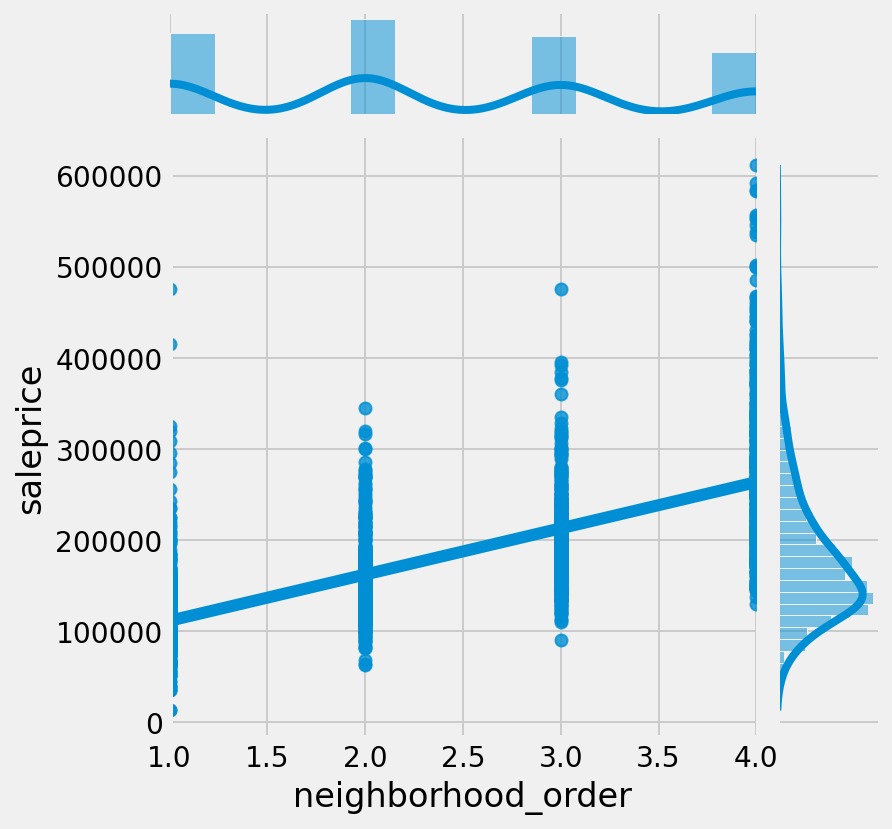

In [83]:
#There is a linear relationship between ordered neighborhood by price and saleprice. Also aprox. equal distribution items in each bin. This feature is a valuable one in the model.
sns.jointplot(x=ames['neighborhood_order'],y=ames['saleprice'],kind="reg");

In [84]:
#Sale Type ordered by price
ames['sale_type_order'] = ames['sale_type']
ames_ordinal_str_columns = ames[['sale_type_order']]

dict_ordinal = {
   'ConLw':1,
    'Oth':1,
    'ConLD':1,
    'COD':1,
    'WD':2,
    'WD ':2,
    'CWD':3,
    'ConLI':3,
    'Con':3,
    'New':3
        }

#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [85]:
ames['sale_type_order'].unique()

array([2, 3, 1], dtype=int64)

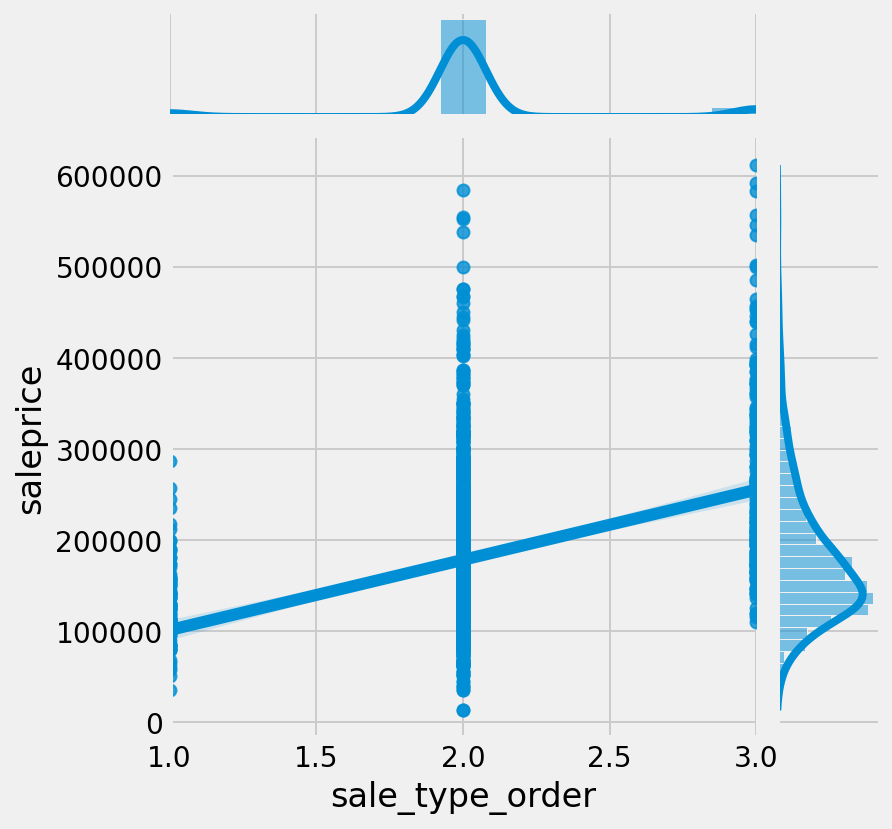

In [86]:
#this has a linear r-ship
sns.jointplot(x=ames['sale_type_order'],y=ames['saleprice'],kind="reg");

In [87]:
ames.groupby('sale_type')['saleprice'].mean().sort_values() #new and higher downpayment cost more

sale_type
ConLw    124600.000000
Oth      127497.750000
ConLD    129091.352941
COD      133574.523810
WD       174912.251544
CWD      186635.000000
ConLI    207992.857143
Con      241807.500000
New      279021.056250
Name: saleprice, dtype: float64

In [88]:
ames.groupby('sale_type')['saleprice'].agg(['mean','count']) 

mean  count
sale_type                      
COD        133574.523810     63
CWD        186635.000000     10
Con        241807.500000      4
ConLD      129091.352941     17
ConLI      207992.857143      7
ConLw      124600.000000      5
New        279021.056250    160
Oth        127497.750000      4
WD         174912.251544   1781

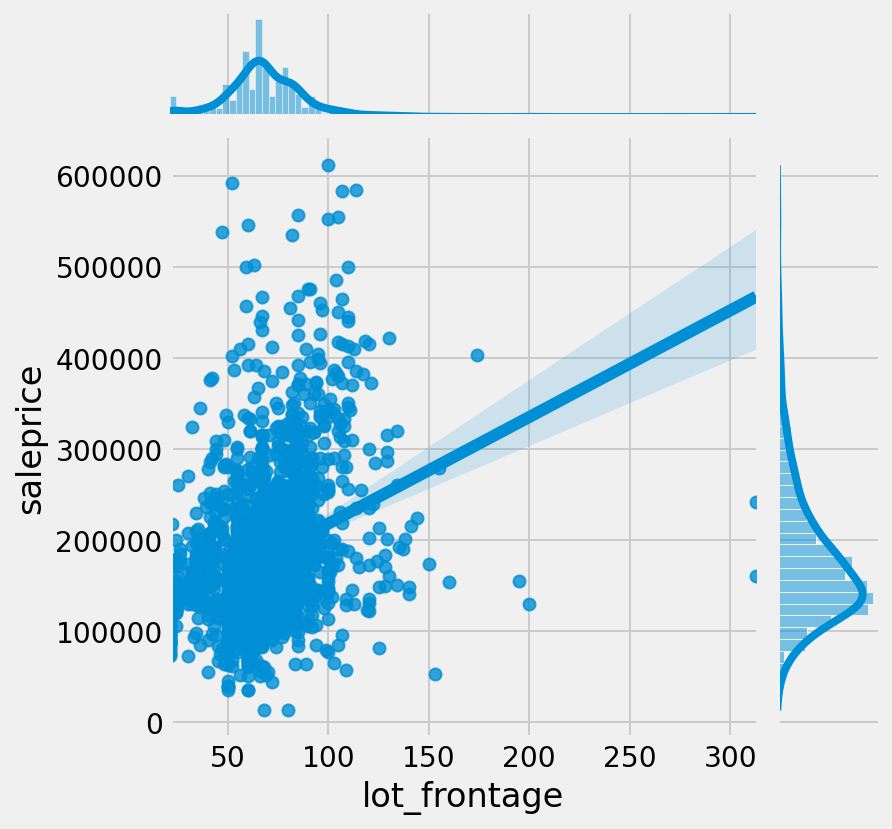

In [89]:
# lot_frontage and saleprice have a linear r-ship
sns.jointplot(x=ames['lot_frontage'],y=ames['saleprice'],kind="reg")

In [90]:
x_frontage = ames[ames['lot_frontage'] > 250] #outliers to drop
x_frontage

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1335  1266  535427070           20        RL         313.0     27650   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1335    NA          2          HLS          4     Inside           0   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
960       Edwards       Feedr        Norm      1Fam      2Story            10   
1335        NAmes        PosA        Norm      1Fam      1Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1335             7        1960            2007       Flat   Tar&Grv   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1335      Wd Sdng      Wd Sdng         None           0.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1335           3     CBlock          4          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1335               6         425.0               1           0.0        160.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1335          585.0    GasA           5           Y           1        2069   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1335           0                0         2069             1.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
960              0.0          2          1              3              1   
1335             0.0          2          0              4              1   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
960              5             12           1           3             4   
1335             4              9           1           1             4   

     garage_type  garage_yr_blt  garage_finish  garage_cars  garage_area  \
960       Attchd         2008.0              3          2.0       1418.0   
1335      Attchd         1960.0              2          2.0        505.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
960             3            3            2           214            292   
1335            3            3            2             0              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
960                0           0             0        480        4      0   
1335               0           0             0          0        0      0   

     misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  \
960            NA         0        1     2008       New     160000   
1335           NA         0       11     2008       WD      242000   

      neighborhood_order  sale_type_order  
960                    1                3  
1335                   2                2

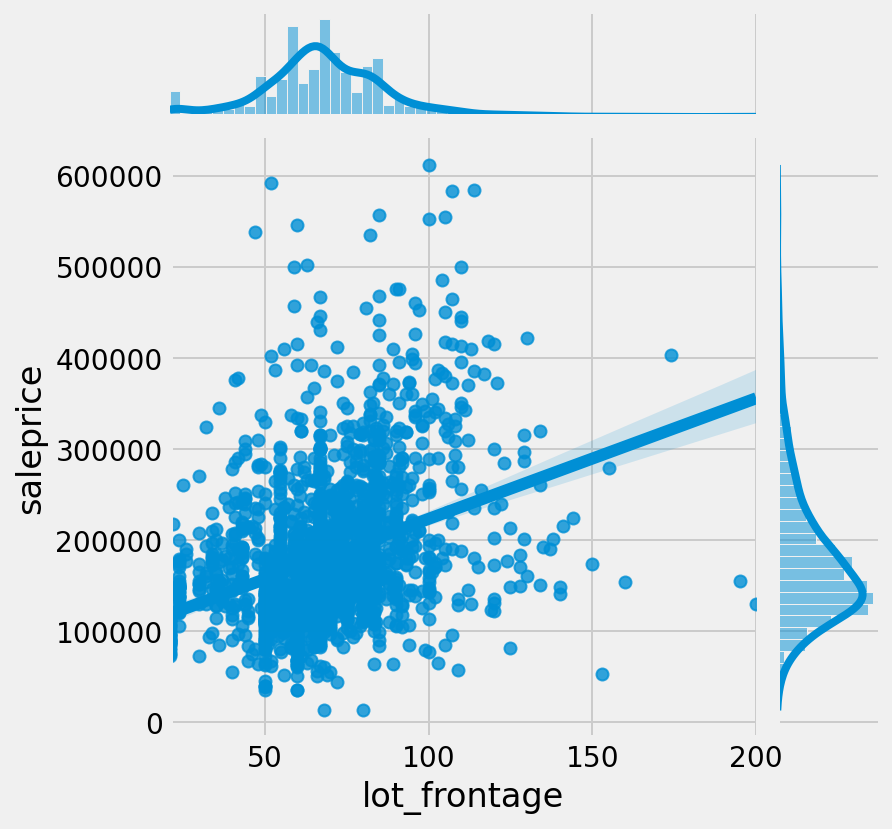

In [91]:
x_frontage = ames[ames['lot_frontage'] < 313]

sns.jointplot(x=x_frontage['lot_frontage'],y=x_frontage['saleprice'],kind="reg"); #r-ship without outliers look significantly more linear

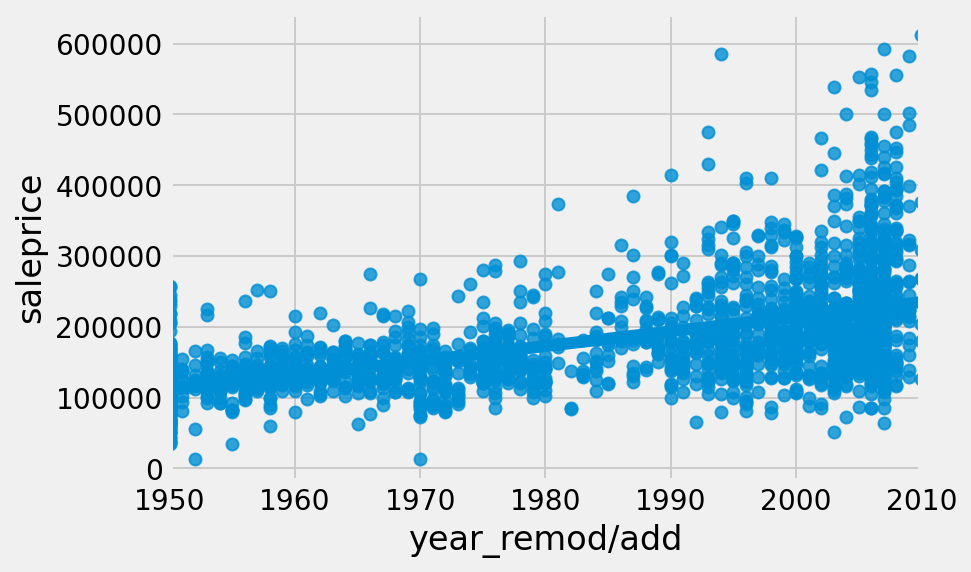

In [92]:
sns.regplot(x=ames['year_remod/add'],y=ames['saleprice']); #there is a linear relationship here between year remodeled and saleprice. This is a dummy feature. Seems like there are 
#way more remodels in the 2000's than before. I wonder why. More people moving to the city of Ames?

<AxesSubplot:xlabel='year_built', ylabel='saleprice'>

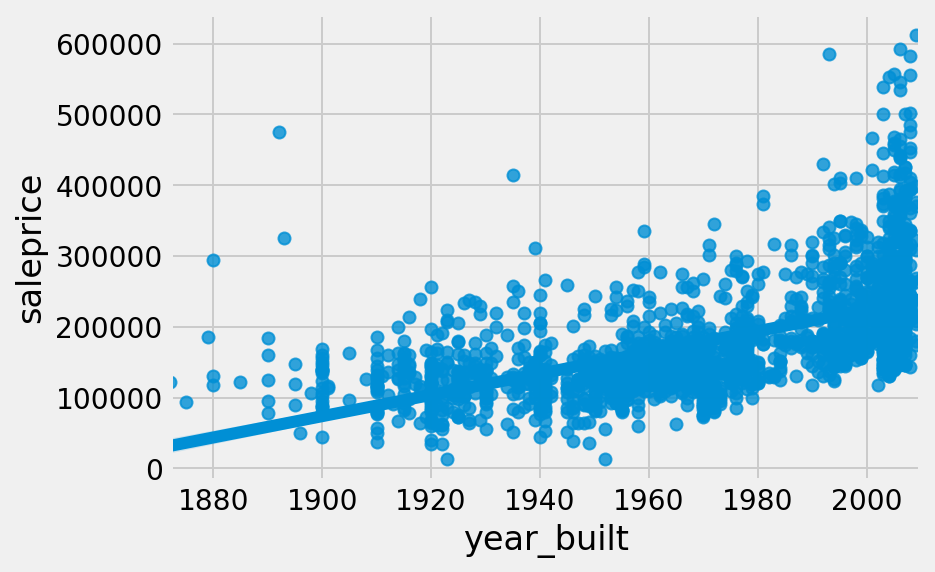

In [93]:
sns.regplot(x=ames['year_built'],y=ames['saleprice']) #same for year that a house was built. I will make a column 'age' for age of house at time of sale

In [94]:
ames['basement_overall'] = ames['bsmt_qual'] *ames['bsmt_exposure'] #an overall score of basement quality in ceiling height and access to outside

<AxesSubplot:xlabel='bsmt_qual', ylabel='saleprice'>

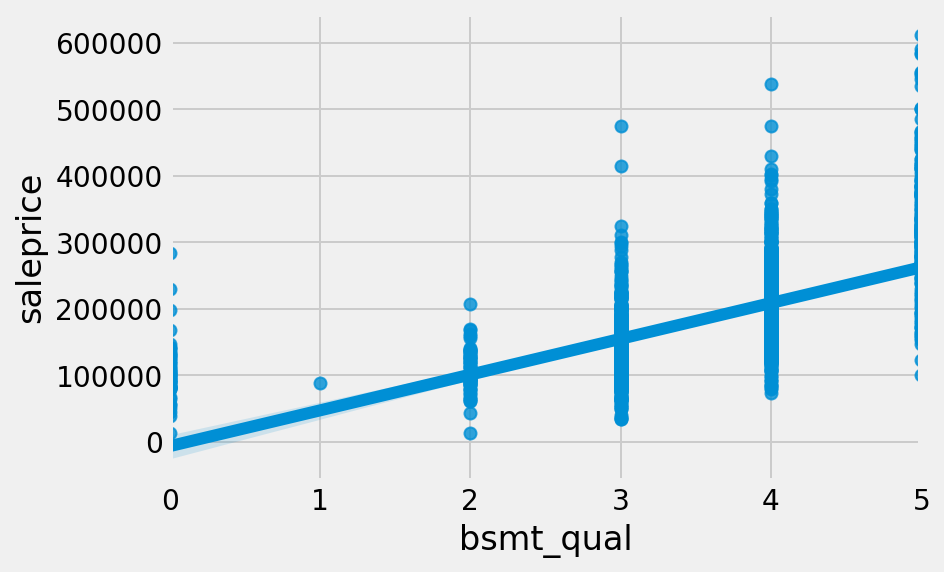

In [95]:
sns.regplot(x=ames['bsmt_qual'],y=ames['saleprice'])

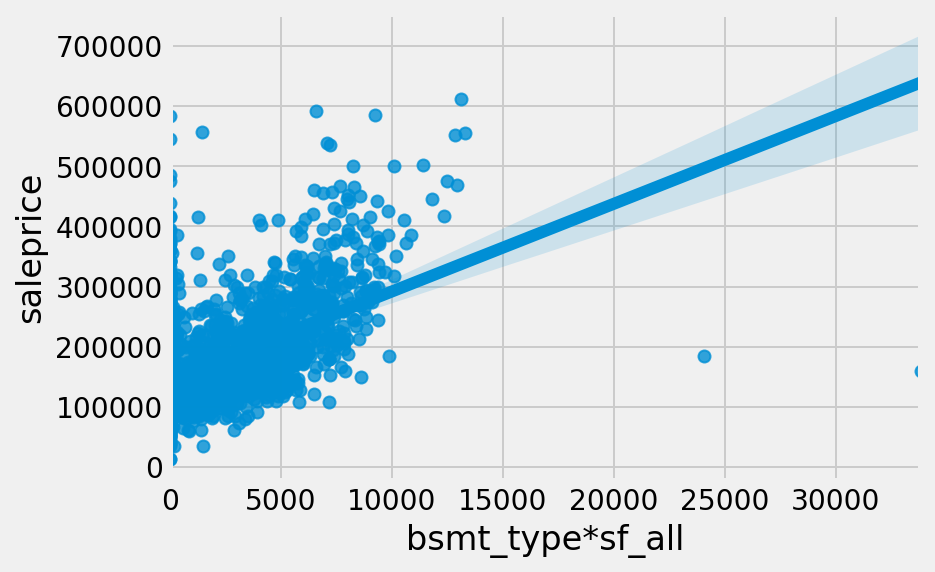

In [96]:
ames['bsmt_type*sf_all'] = (ames['bsmtfin_type_1']*ames['bsmtfin_sf_1']) + (ames['bsmtfin_type_2']*ames['bsmtfin_sf_2']) #quality*sf interaction variable. Clear outliers
sns.regplot(x=ames['bsmt_type*sf_all'],y=ames['saleprice']);

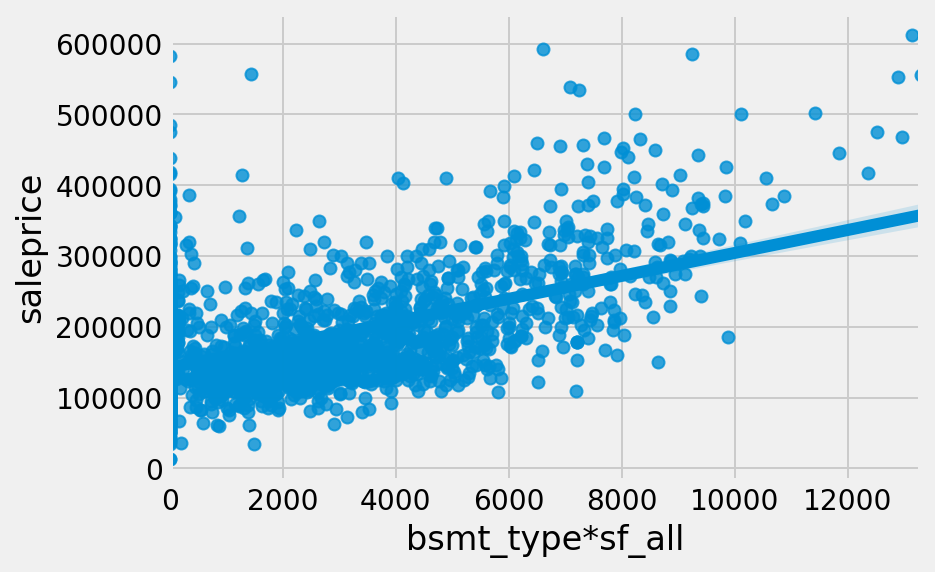

In [97]:
ames['bsmt_type*sf_all'] = (ames['bsmtfin_type_1']*ames['bsmtfin_sf_1']) + (ames['bsmtfin_type_2']*ames['bsmtfin_sf_2']) #quality*sf interaction variable
bsmt_no_outliers = ames[ames['bsmt_type*sf_all'] < 20000]
sns.regplot(x=bsmt_no_outliers['bsmt_type*sf_all'],y=bsmt_no_outliers['saleprice']); #looks really nice with those outliers masked

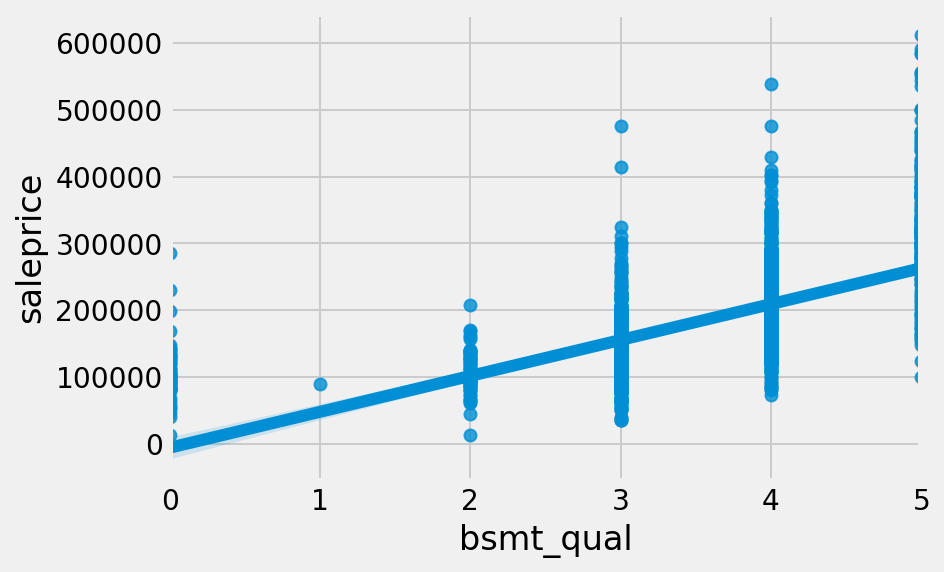

In [98]:
sns.regplot(x=ames['bsmt_qual'],y=ames['saleprice']); # basement ceiling height is has a linear r-ship with saleprice

In [99]:
ames[ames['bsmt_type*sf_all'] > 20000] #outliers to drop

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1885    NA          3          Bnk          4     Inside           3   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
960       Edwards       Feedr        Norm      1Fam      2Story            10   
1885      Edwards        Norm        Norm      1Fam      1Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1885      CemntBd      CmentBd        Stone        1224.0           5   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1885           3      PConc          5          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1885               6        4010.0               1           0.0       1085.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1885         5095.0    GasA           5           Y           1        5095   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1885           0                0         5095             1.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
960              0.0          2          1              3              1   
1885             1.0          2          1              2              1   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
960              5             12           1           3             4   
1885             5             15           1           2             4   

     garage_type  garage_yr_blt  garage_finish  garage_cars  garage_area  \
960       Attchd         2008.0              3          2.0       1418.0   
1885      Attchd         2008.0              3          3.0       1154.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
960             3            3            2           214            292   
1885            3            3            2           546            484   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
960                0           0             0        480        4      0   
1885               0           0             0          0        0      0   

     misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  \
960            NA         0        1     2008       New     160000   
1885         Elev     17000       10     2007       New     183850   

      neighborhood_order  sale_type_order  basement_overall  bsmt_type*sf_all  
960                    1                3                20           33864.0  
1885                   1                3                20           24060.0

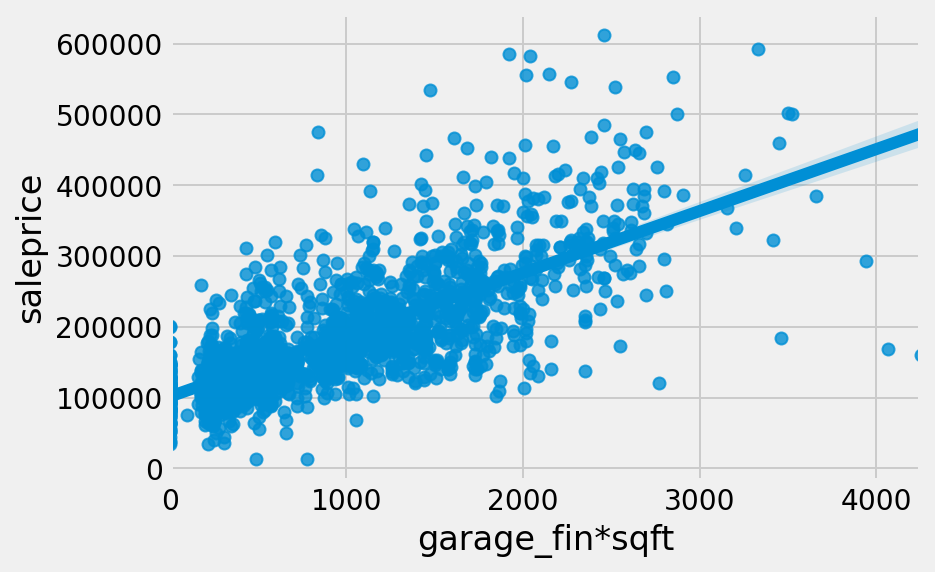

In [100]:
ames['garage_fin*sqft'] = ames['garage_area']*ames['garage_finish'] #this is the man cave feature. I want a finished garage that is massive. A garage with a lot of space for crafting.
sns.regplot(x=ames['garage_fin*sqft'],y=ames['saleprice']);

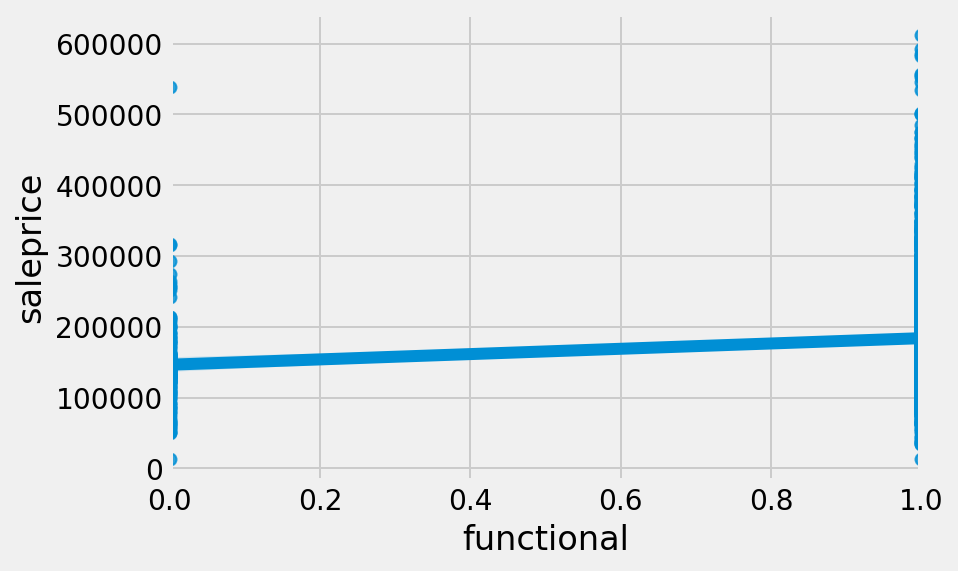

In [101]:
sns.regplot(x=ames['functional'],y=ames['saleprice']); #A little bit north, but mostly east. Looks too far to call this north-east. This feature combined with another house type
#feature could be worth exploring.

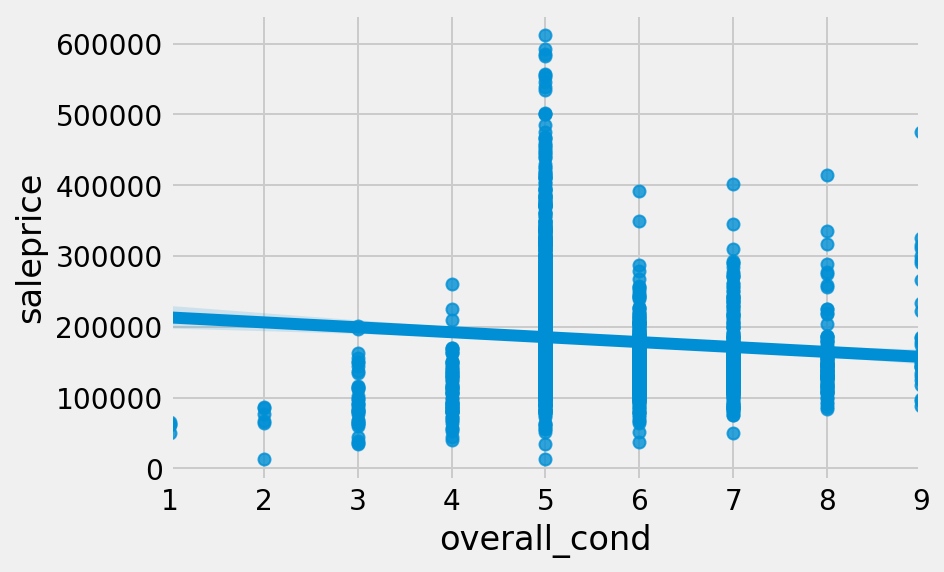

In [102]:
sns.regplot(x=ames['overall_cond'],y=ames['saleprice']); #The first downward sloping variable. Negatively correlated. I would not expect that as the condition of a house increases
#its value decreases. I wonder if there is something else going on. 

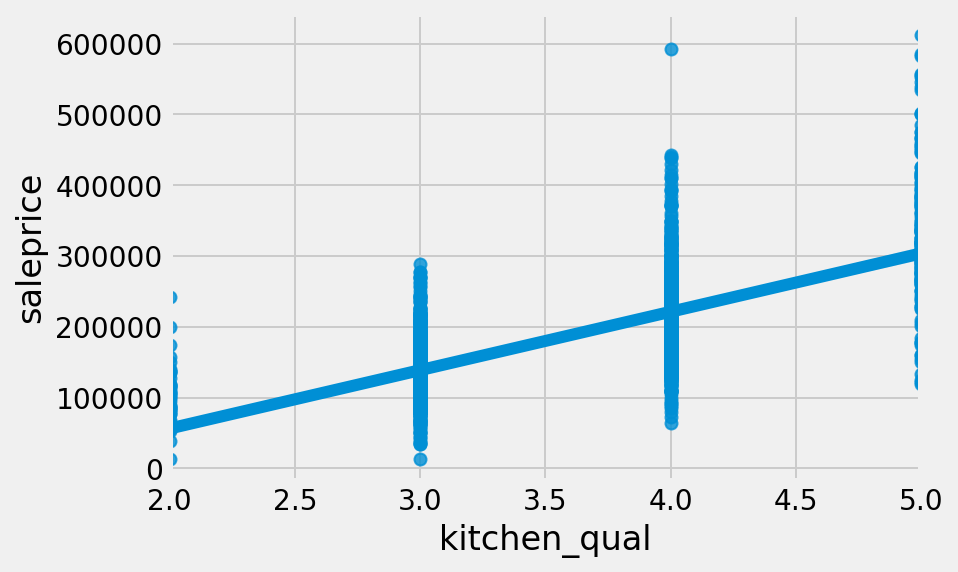

In [103]:
sns.regplot(x=ames['kitchen_qual'],y=ames['saleprice']); #This is a model variable. It is a great feature for the model.

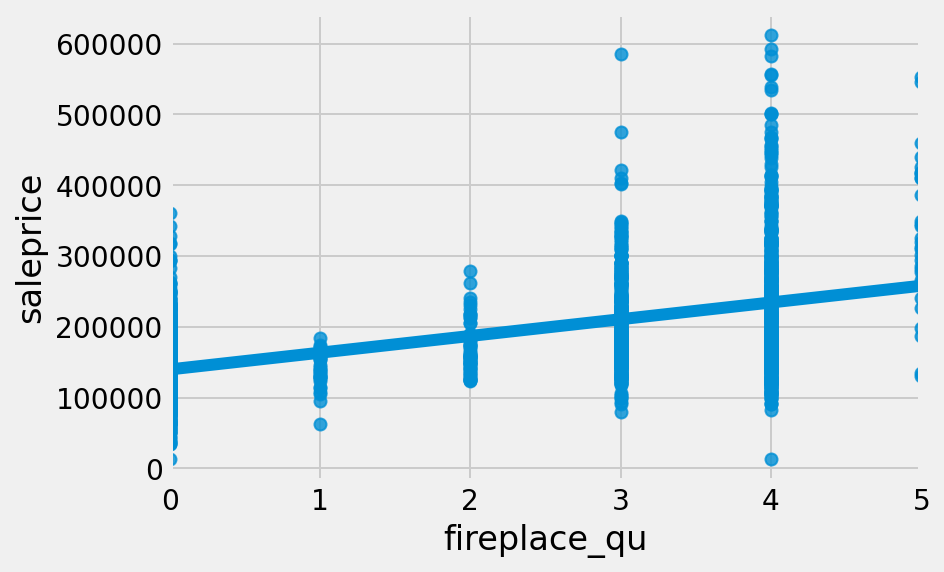

In [104]:
sns.regplot(x=ames['fireplace_qu'],y=ames['saleprice']); #fireplace quality is another great feature for the model. It can tell me if a house has a fireplace and the quality of that 
#fireplace. The fireplace number feature tells me less as there is a diminishing marginal return every additional fireplace after the first fireplace has been installed. 

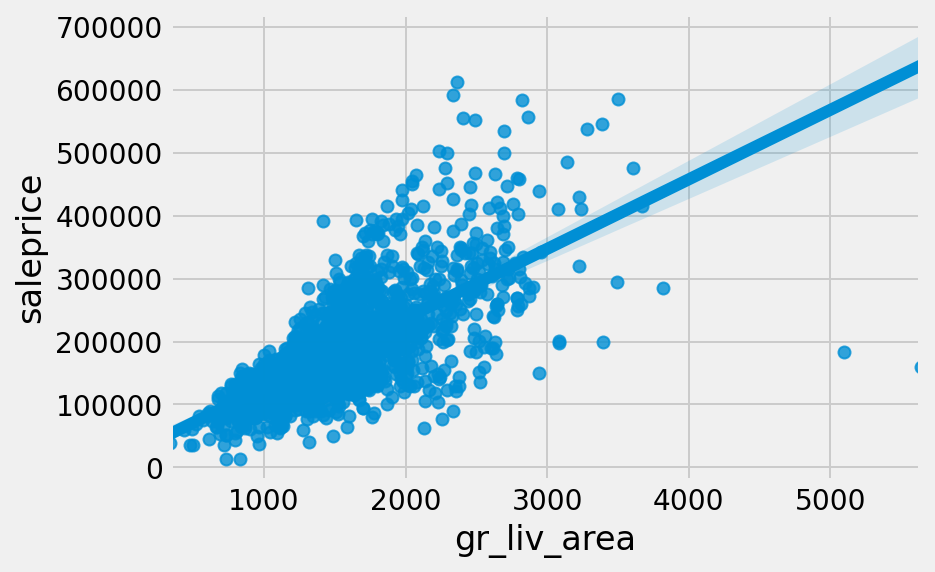

In [105]:
sns.regplot(x=ames['gr_liv_area'],y=ames['saleprice']); # this is a great feature. As living space increases sales price strongly increases.

In [106]:
ames['quality_above_sqft'] = (ames['1st_flr_sf']+ames['2nd_flr_sf']) - ames['low_qual_fin_sf'] #People are paying for quality space more than they are looking for low quality space. 
# I'll combine these three into one and make a variable that is better than gr_liv_area while reducing 4 features into one. 

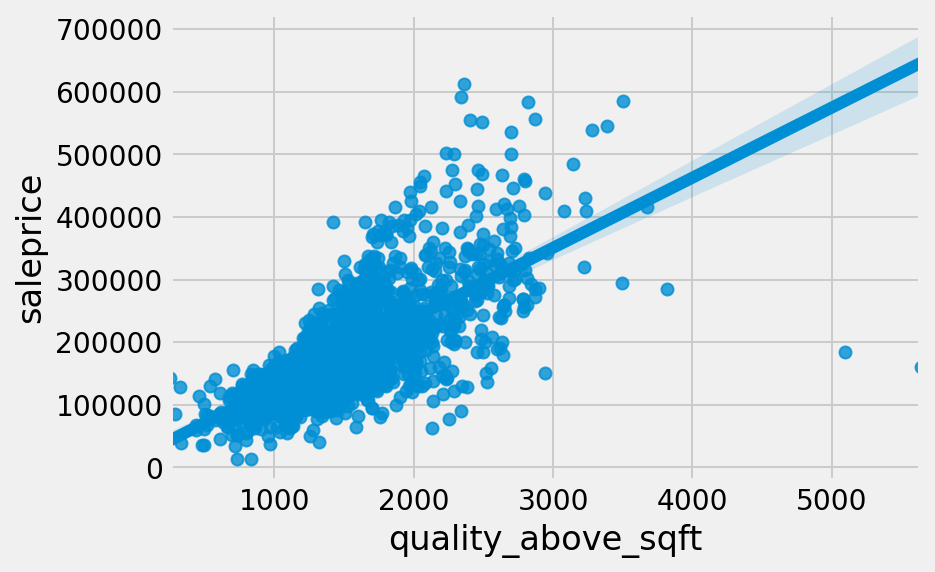

In [107]:
 sns.regplot(x=ames['quality_above_sqft'],y=ames['saleprice']); # beautiful. What's up with those outliers though?

In [108]:
ames[ames['1st_flr_sf']>4000] #same ID's as for basement and 1499 was outlier on frontage as well. These will be dropped.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1885    NA          3          Bnk          4     Inside           3   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
960       Edwards       Feedr        Norm      1Fam      2Story            10   
1885      Edwards        Norm        Norm      1Fam      1Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1885      CemntBd      CmentBd        Stone        1224.0           5   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1885           3      PConc          5          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1885               6        4010.0               1           0.0       1085.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1885         5095.0    GasA           5           Y           1        5095   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1885           0                0         5095             1.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
960              0.0          2          1              3              1   
1885             1.0          2          1              2              1   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
960              5             12           1           3             4   
1885             5             15           1           2             4   

     garage_type  garage_yr_blt  garage_finish  garage_cars  garage_area  \
960       Attchd         2008.0              3          2.0       1418.0   
1885      Attchd         2008.0              3          3.0       1154.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
960             3            3            2           214            292   
1885            3            3            2           546            484   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
960                0           0             0        480        4      0   
1885               0           0             0          0        0      0   

     misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  \
960            NA         0        1     2008       New     160000   
1885         Elev     17000       10     2007       New     183850   

      neighborhood_order  sale_type_order  basement_overall  bsmt_type*sf_all  \
960                    1                3                20           33864.0   
1885                   1                3                20           24060.0   

      garage_fin*sqft  quality_above_sqft  
960            4254.0                5642  
1885           3462.0                5095

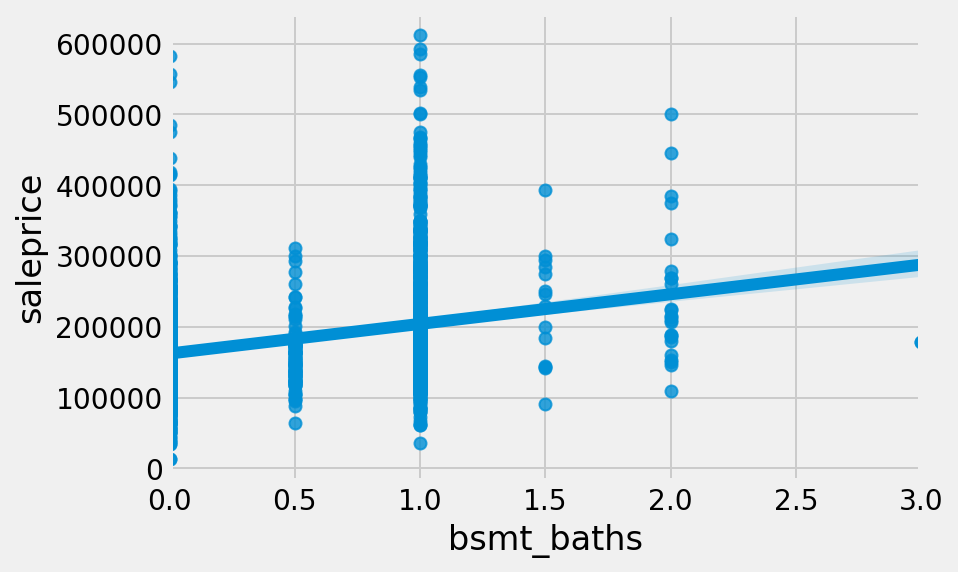

In [109]:
ames['bsmt_baths'] = ames['bsmt_full_bath']+(ames['bsmt_half_bath']/2) #combine basment baths to reduce features and more accurately portray the bathroom story.
sns.regplot(x=ames['bsmt_baths'],y=ames['saleprice']);

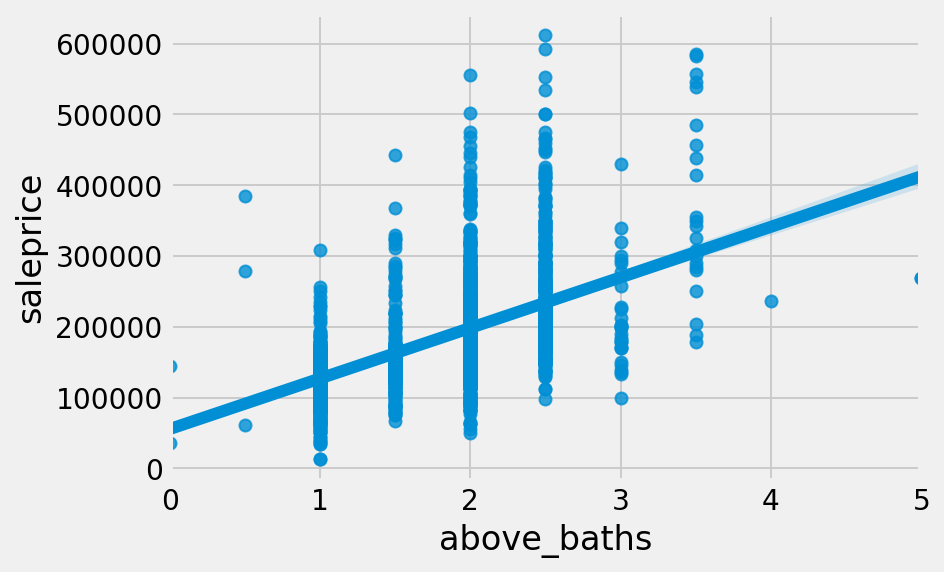

In [110]:
ames['above_baths'] = ames['full_bath']+(ames['half_bath']/2) #combine upstairs baths
sns.regplot(x=ames['above_baths'],y=ames['saleprice']);

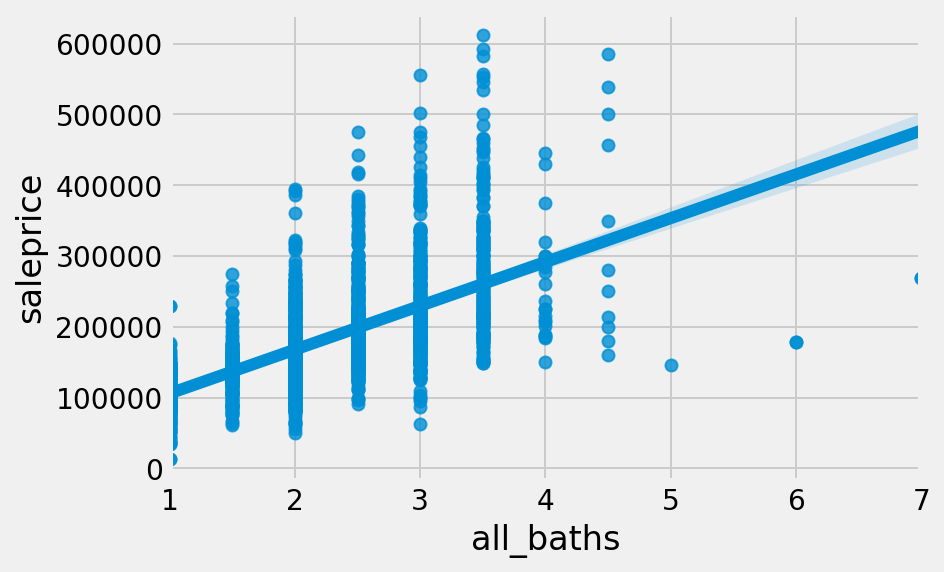

In [111]:
ames['all_baths'] = ames['above_baths'] + ames['bsmt_baths'] #I like this all bath feature, more how I think about baths in a home.
sns.regplot(x=ames['all_baths'],y=ames['saleprice']);

In [112]:
ames[ames['all_baths'] == 7] #outliers

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1566  816  906230010           90        RL     66.759571     11855   Pave   
1605  817  906230020           90        RL     66.759571      7939   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
1566    NA          4          Lvl          4     Inside           3   
1605    NA          4          Lvl          4     Inside           3   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1566      SawyerW        Norm        Norm    Duplex      2Story             7   
1605      SawyerW       Feedr        Norm    Duplex      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1566             5        2000            2000        Hip   CompShg   
1605             5        2000            2000        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
1566      VinylSd      VinylSd      BrkFace          23.0           3   
1605      VinylSd      VinylSd      BrkFace          23.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
1566           3      PConc          5          3              1   
1605           3      PConc          5          3              1   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
1566               6         820.0               1           0.0        348.0   
1605               6         820.0               1           0.0        348.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
1566         1168.0    GasA           5           Y           1        1168   
1605         1168.0    GasA           5           Y           1        1168   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
1566        1619                0         2787             2.0   
1605        1619                0         2787             2.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
1566             0.0          4          2              6              2   
1605             0.0          4          2              6              2   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
1566             3              8           1           2             3   
1605             3              8           1           2             3   

     garage_type  garage_yr_blt  garage_finish  garage_cars  garage_area  \
1566     BuiltIn         2000.0              3          4.0        820.0   
1605     BuiltIn         2000.0              3          4.0        820.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
1566            3            3            2           312              0   
1605            3            3            2           312              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
1566               0           0             0          0        0      0   
1605               0           0             0          0        0      0   

     misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  \
1566           NA         0       10     2009       WD      269500   
1605           NA         0       10     2009       WD      269500   

      neighborhood_order  sale_type_order  basement_overall  bsmt_type*sf_all  \
1566                   2                2                 5            4920.0   
1605                   2                2                 5            4920.0   

      garage_fin*sqft  quality_above_sqft  bsmt_baths  above_baths  all_baths  
1566           2460.0                2787         2.0          5.0        7.0  
1605           2460.0                2787         2.0          5.0        7.0

In [113]:
ames.groupby('bedroom_abvgr')['saleprice'].agg(['mean','count']) #Was expecting a more linear r-ship here

mean  count
bedroom_abvgr                      
0              240791.800000      5
1              182388.920000     75
2              164656.601103    544
3              180627.309567   1108
4              215374.792453    265
5              203885.951220     41
6              164111.333333     12
8              200000.000000      1

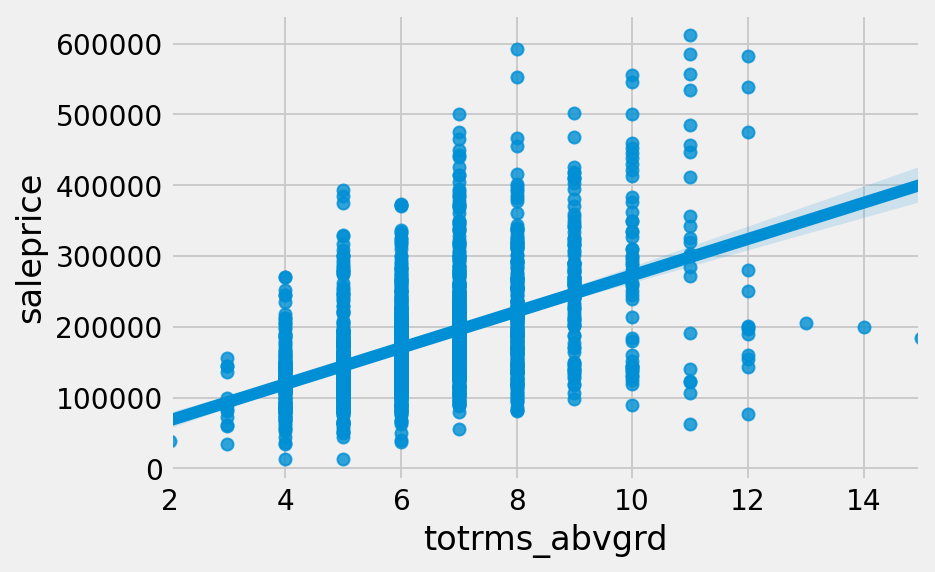

In [114]:
sns.regplot(x=ames['totrms_abvgrd'],y=ames['saleprice']); #this is a model feature

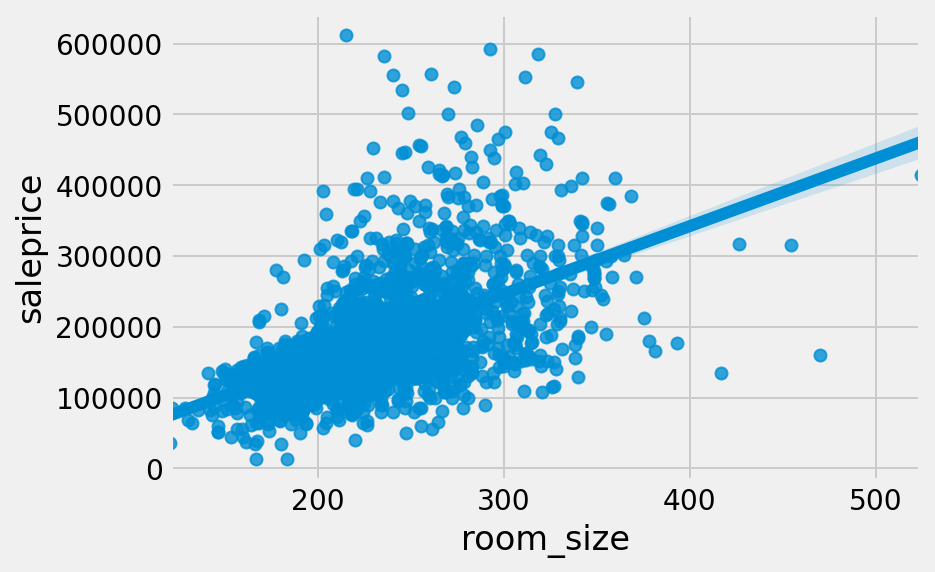

In [115]:
ames['room_size'] = ames['gr_liv_area'] / (ames['totrms_abvgrd']) #sqft per room w/o baths. This performs better than with baths. I want a measure of the size of the rooms in houses.
sns.regplot(x=ames['room_size'],y=ames['saleprice']); 

In [116]:
ames.groupby('room_size')['saleprice'].agg(['mean']) #this is pretty linear

mean
room_size           
120.000000   35311.0
121.000000   86000.0
128.000000   84900.0
130.000000   68500.0
132.000000   63900.0
...              ...
416.500000  135000.0
426.400000  316600.0
454.333333  315000.0
470.166667  160000.0
524.571429  415000.0

[1265 rows x 1 columns]

In [117]:
ames['kitchen_abvgr'].value_counts() #most every house has 1. Not worth including. Houses have kitchens or they are industrial spaces maybe?

1    1960
2      88
0       2
3       1
Name: kitchen_abvgr, dtype: int64

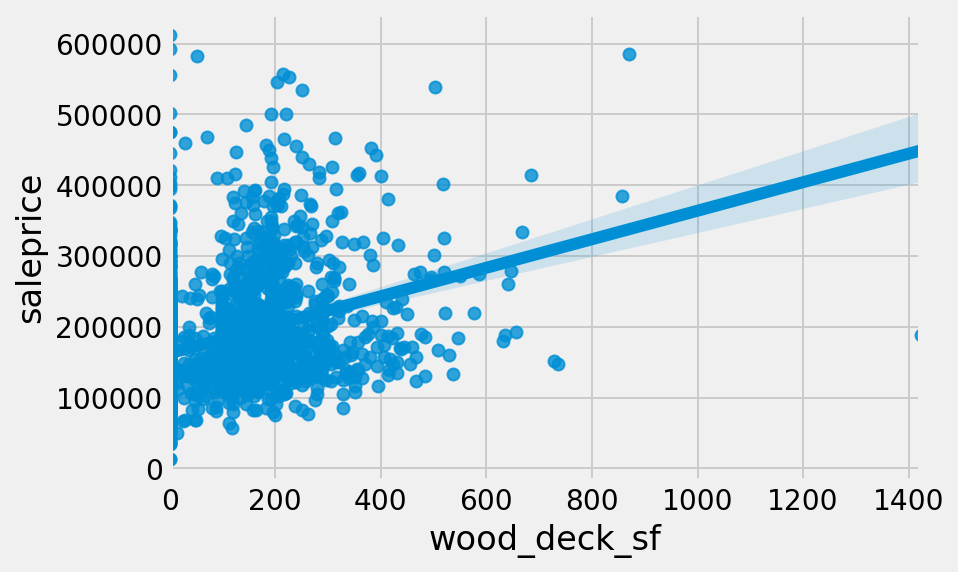

In [118]:
sns.regplot(x=ames['wood_deck_sf'],y=ames['saleprice']); #looking at exterior features now

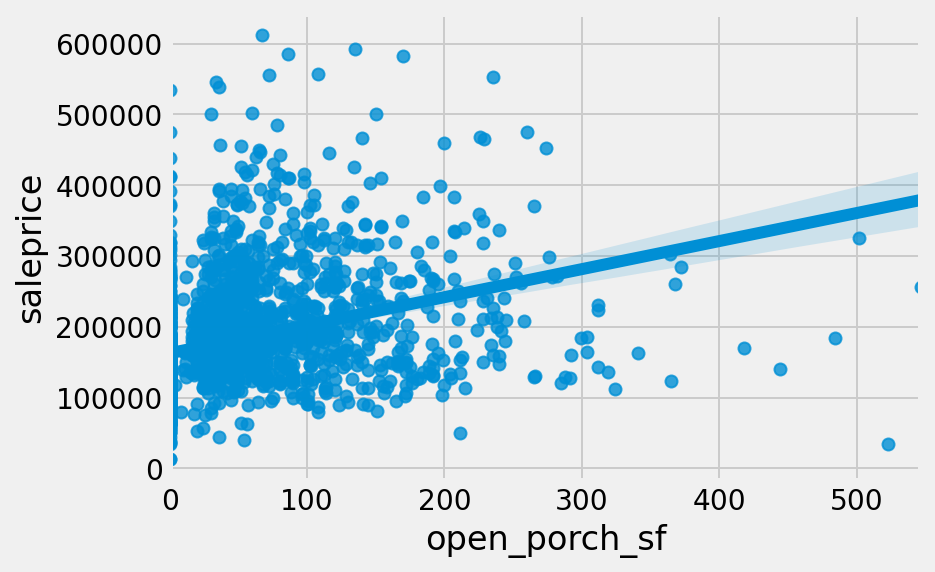

In [119]:
sns.regplot(x=ames['open_porch_sf'],y=ames['saleprice']); #very similar between porch types and deck type

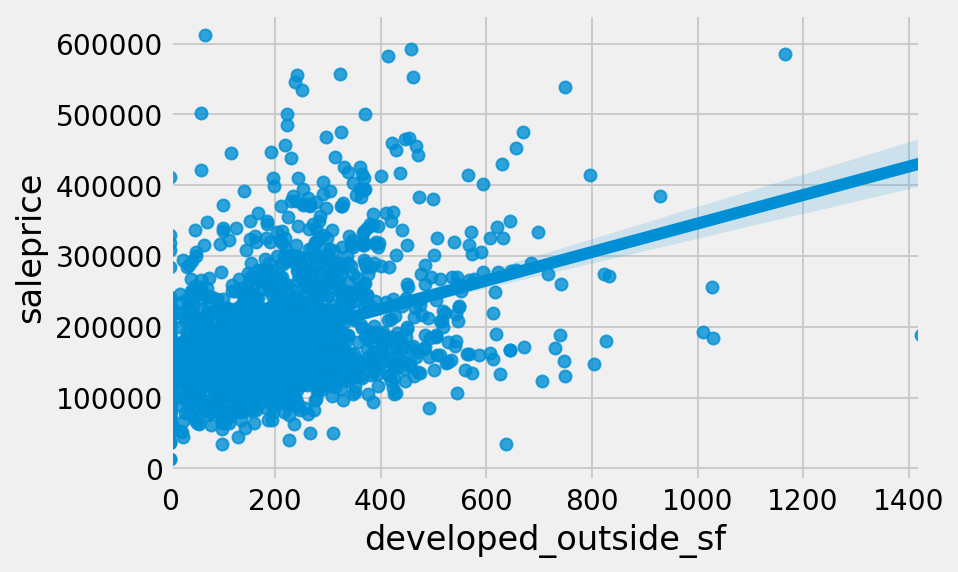

In [120]:
#combine different porches. Trying to measure developed outside space for houses. 
ames['developed_outside_sf'] = ames['open_porch_sf']+ ames['screen_porch'] + ames['enclosed_porch'] +ames['3ssn_porch'] +ames['wood_deck_sf'] 
sns.regplot(x=ames['developed_outside_sf'],y=ames['saleprice']); 

In [121]:
ames.groupby('mo_sold')['saleprice'].agg(['mean', 'count']).sort_values(by = 'count') #while there are more houses sold in warmer months house prices don't vary much by month

mean  count
mo_sold                      
12       182459.615385     78
1        195126.303797     79
11       184377.495146    103
2        177626.519231    104
9        188990.761468    109
10       179334.471545    123
8        186927.359281    167
3        174625.779762    168
4        163901.269231    208
5        180332.369650    257
7        188571.514851    303
6        182662.798295    352

In [122]:
ames.groupby('roof_matl')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') # too uniform, will leave alone for now

mean  count
roof_matl                      
ClyTile    160000.000000      1
CompShg    180849.197037   2025
Tar&Grv    187948.933333     15
Membran    241500.000000      1
WdShake    264250.000000      4
WdShngl    339400.000000      5

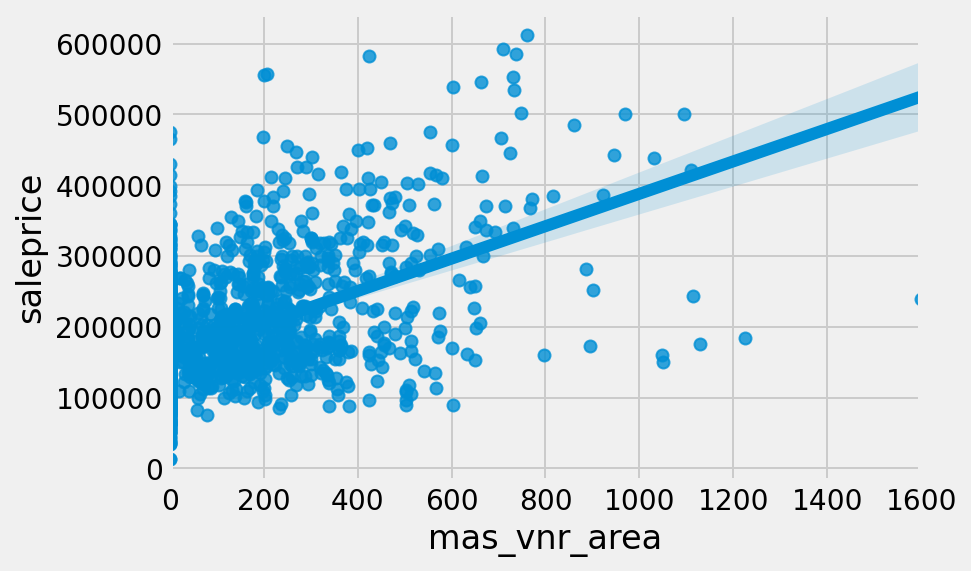

In [123]:
ames['mas_vnr_area']
sns.regplot(x=ames['mas_vnr_area'],y=ames['saleprice']); 

In [124]:
ames['mas_vnr_type']
ames.groupby('mas_vnr_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #pretty good divide in price here. Going group and dummy it.

mean  count
mas_vnr_type                      
BrkCmn        144515.692308     13
None          155120.870161   1240
BrkFace       212161.436508    630
Stone         263714.702381    168

In [125]:
ames['mas_vnr_type_dummy'] = ames['mas_vnr_type']
ames_ordinal_str_columns = ames[['mas_vnr_type_dummy']]

dict_ordinal = {
   'None':0,
    'BrkCmn':0,
    'CBlock':0,
    'BrkFace':1,
    'Stone':1,   
        }

#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [126]:
ames['mas_vnr_type_dummy'].unique()

array([1, 0], dtype=int64)

In [127]:
ames['age'] = ames['yr_sold'] - ames['year_built'] #age of house at time of sale

<AxesSubplot:xlabel='age', ylabel='saleprice'>

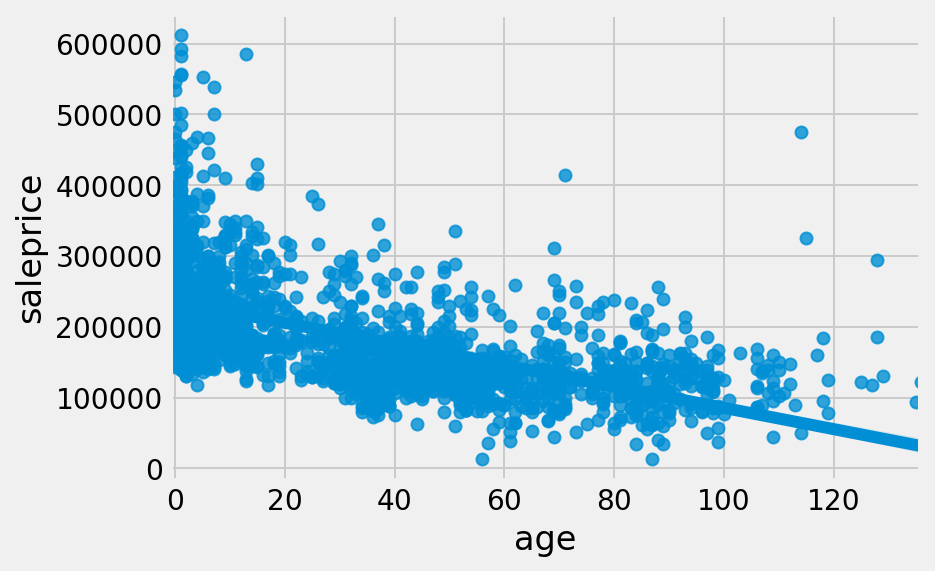

In [128]:
sns.regplot(x=ames['age'],y=ames['saleprice'])

In [129]:
ames['was_remodeled'] =  ames['year_remod/add'] - ames['year_built'] #dummy for if house was remodeled
ames['was_remodeled'] = [1 if i> 0 else 0 for i in ames['was_remodeled']];

In [130]:
ames.groupby('electrical')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #electrical 5 or broke. Maybe change this to 0/1

mean  count
electrical                      
0           117154.557377    183
1           187770.382227   1868

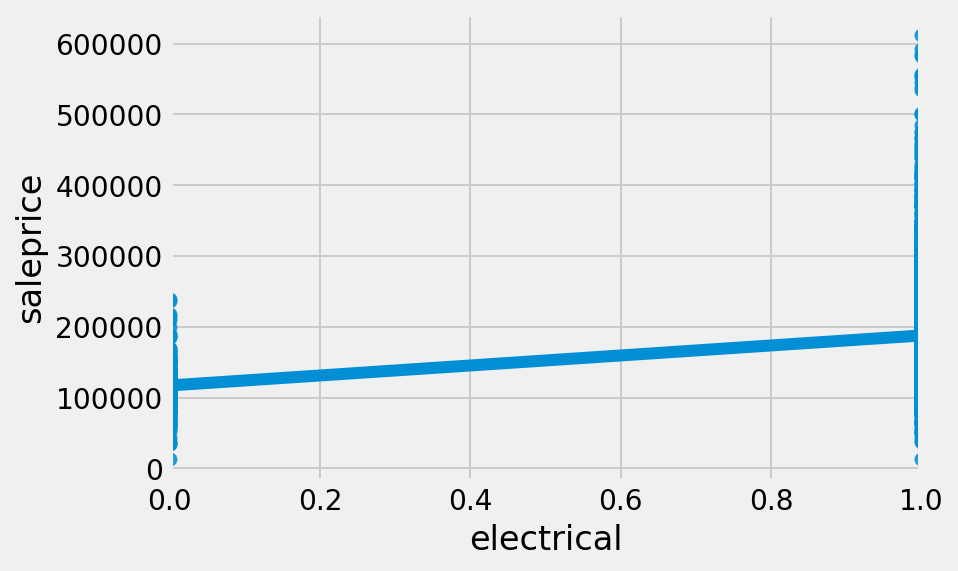

In [131]:
sns.regplot(x=ames['electrical'],y=ames['saleprice']); 

In [132]:
ames.groupby('ms_zoning')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
ms_zoning                      
A (agr)     47300.000000      2
I (all)     57625.000000      1
C (all)     78010.894737     19
RM         129119.142405    316
RH         148859.571429     14
RL         191235.164581   1598
FV         218618.316832    101

In [133]:
ames['is_residential'] = ames['ms_zoning'] # a dummy variable for if a house is residential or other (ag, industrial, corp)
ames_ordinal_str_columns = ames[['is_residential']]

dict_ordinal = {
   'A (agr)':0,
    'I (all)':0,
    'C (all)':0,
    'RM':1,
    'RH':1,
    'RL':1,
    'FV':1,
        }
#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [134]:
ames.groupby('condition_1')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #location matters!

mean  count
condition_1                      
Artery       128765.000000     70
RRNe         129616.666667      3
RRAe         139685.714286     21
Feedr        143223.605505    109
RRAn         172604.777778     36
Norm         185007.310130   1767
RRNn         198208.333333      6
PosA         254733.333333     12
PosN         254794.296296     27

In [135]:
#2 if by positive feature, 1 if normal, 0 if negative feature. 
ames['positive_condition1'] = ames['condition_1']
ames['positive_condition2'] = ames['condition_2']
ames_ordinal_str_columns = ames[['positive_condition2', 'positive_condition1']]


dict_ordinal = {
   'Artery':0,
    'RRNe':0,
    'RRAe':0,
    'Feedr':0,
    'RRAn':0,
    'Norm':1,
    'RRNn':0,
    'PosN':2,
    'PosA':2,
        }

#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [136]:
ames['local_conditions'] = ames['positive_condition1']+ames['positive_condition2'] #this a combined measure of local features. Railroads and busy streets are just not quite as nice
#to live by as are greenbelts and parks and even normal places

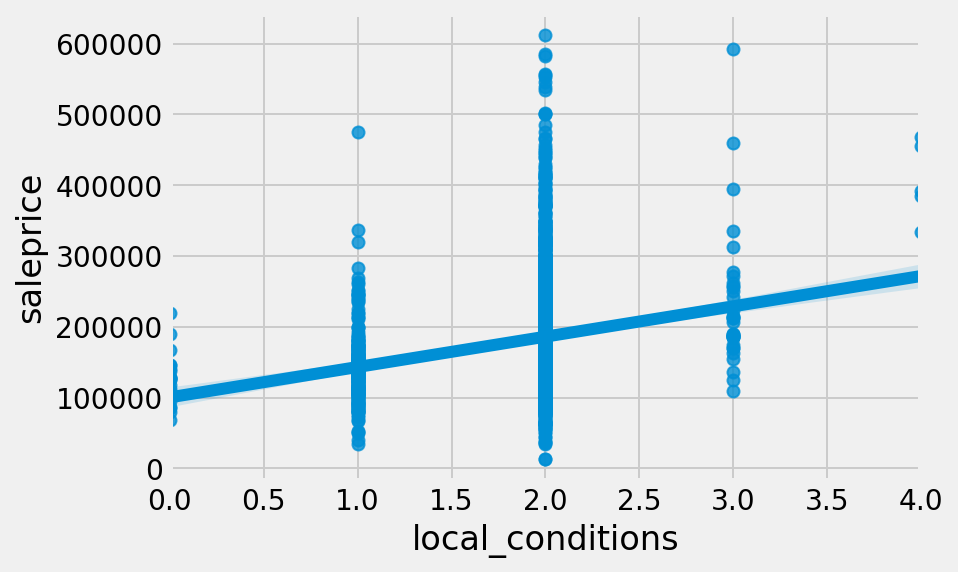

In [137]:
sns.regplot(x=ames['local_conditions'],y=ames['saleprice']); 

In [138]:
#2 if by positive feature, 1 if normal, 0 if negative feature. 
ames['exterior_ordinal1'] = ames['exterior_1st']
ames['exterior_ordinal2'] = ames['exterior_2nd']
ames_ordinal_str_columns = ames[['exterior_ordinal2', 'exterior_ordinal1']]

dict_ordinal = {
     'AsphShn':1,
    'CBlock':1,
    'AsbShng':1,
    'Brk Cmn':2,
    'BrkComm':2,
     'Stucco':2,
    'PreCast':2,
    'Other':3,
    'Wd Shng':3,
    'Wd Sdng':3,
    'MetalSd':3,
    'WdShing':3,
    'HdBoard':3,      
    'Plywood':4,
    'BrkFace':5,       
    'VinylSd':5,
    'CmentBd':5,
    'CemntBd':5,
    'Stone':5,    
    'ImStucc':5,        
        }
#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [139]:
ames['exterior_ordinal2'].unique()

array([4, 5, 3, 1, 2], dtype=int64)

In [140]:
ames['external_feature'] = ames['exterior_ordinal1'] + ames['exterior_ordinal2']

In [141]:
ames.groupby('exterior_1st')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #exterior feature sorted by price. Stuff like if your house front is made out of Vinyl in 
#the heart of Iowa or wood. We love our plastics in suburbia. 

mean  count
exterior_1st                      
AsphShn        82375.000000      1
CBlock         93250.000000      2
AsbShng       103183.333333     33
BrkComm       131000.000000      3
Stucco        139712.962963     27
Wd Sdng       142940.887681    276
MetalSd       154402.048338    331
WdShing       155616.822222     45
HdBoard       159582.473333    300
Plywood       170511.453947    152
BrkFace       193055.093750     64
VinylSd       218174.082873    724
CemntBd       243429.088889     90
Stone         258500.000000      2
ImStucc       262000.000000      1

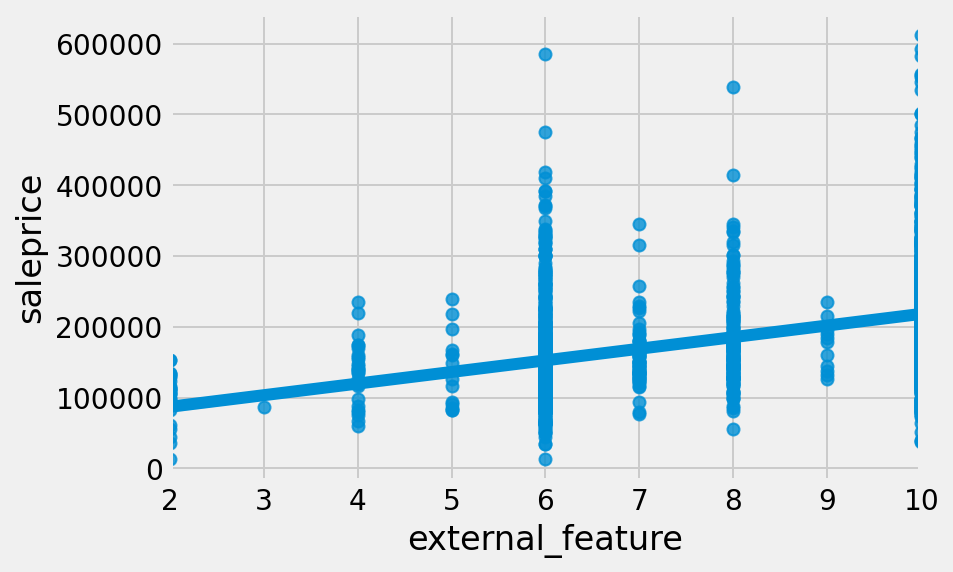

In [142]:
sns.regplot(x=ames['external_feature'],y=ames['saleprice']); 

In [143]:
# bin before dummy. 
ames['house_style_condensed'] = ames['house_style'] 
ames_ordinal_str_columns = ames[['house_style_condensed']]

dict_ordinal = {
    '1.5Unf':1.5,
    '1.5Fin':1.5,
    'SFoyer':1.5,
    'SLvl':1,
    '1Story':1,
     '2.5Unf':2,
    '2Story':2,
    '2.5Fin':2    
        }
#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [144]:
#dummy building type
ames = pd.get_dummies(data = ames, columns=['house_style_condensed'], drop_first=True)

In [145]:
ames.groupby('house_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
house_style                      
1.5Unf       112466.666667     12
1.5Fin       136480.091743    218
SFoyer       149343.920000     50
SLvl         166248.989362     94
1Story       179809.194523   1059
2.5Unf       191785.714286     14
2Story       206408.963211    598
2.5Fin       243666.666667      6

In [146]:
ames.groupby('bldg_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

mean  count
bldg_type                      
2fmCon     123179.891304     46
Twnhs      133100.000000     69
Duplex     139296.333333     75
1Fam       185275.685882   1700
TwnhsE     198312.372671    161

In [147]:
#dummy building type
ames = pd.get_dummies(data = ames, columns=['bldg_type'], drop_first=True)

In [148]:
pd.options.display.max_columns = 250

In [149]:
ames.groupby('roof_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') #too many at gabel, will leave alone for now

mean  count
roof_style                      
Gambrel     138208.333333     12
Mansard     152642.857143      7
Gable       171264.253243   1619
Flat        191613.076923     13
Shed        208666.666667      3
Hip         224366.654912    397

In [150]:
# dummy for hip/nicer roof styles
ames['is_hip_roof'] = ames['roof_style'] 
ames_ordinal_str_columns = ames[['is_hip_roof']]

dict_ordinal = {
    'Gambrel':0,
    'Mansard':0,
    'Gable':0,
    'Flat':1,
    'Shed':1,
     'Hip':1,   
        }
#loop to get the job done
for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

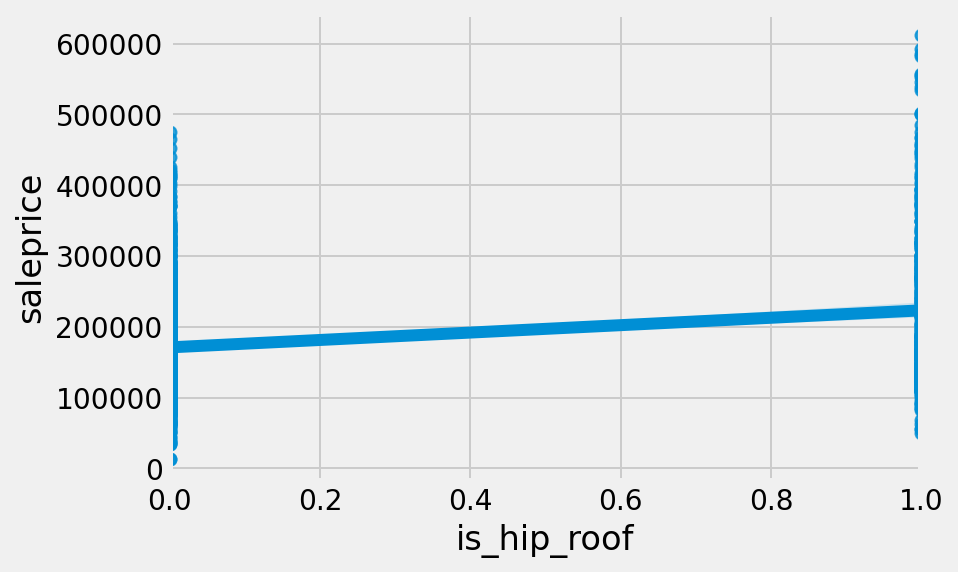

In [151]:
sns.regplot(x=ames['is_hip_roof'],y=ames['saleprice']); 

In [152]:
#pd.DataFrame(ames.columns)

### The plots are over. Welcome to correlation heat map central. I take a closer look at correlation to sales price for model features.

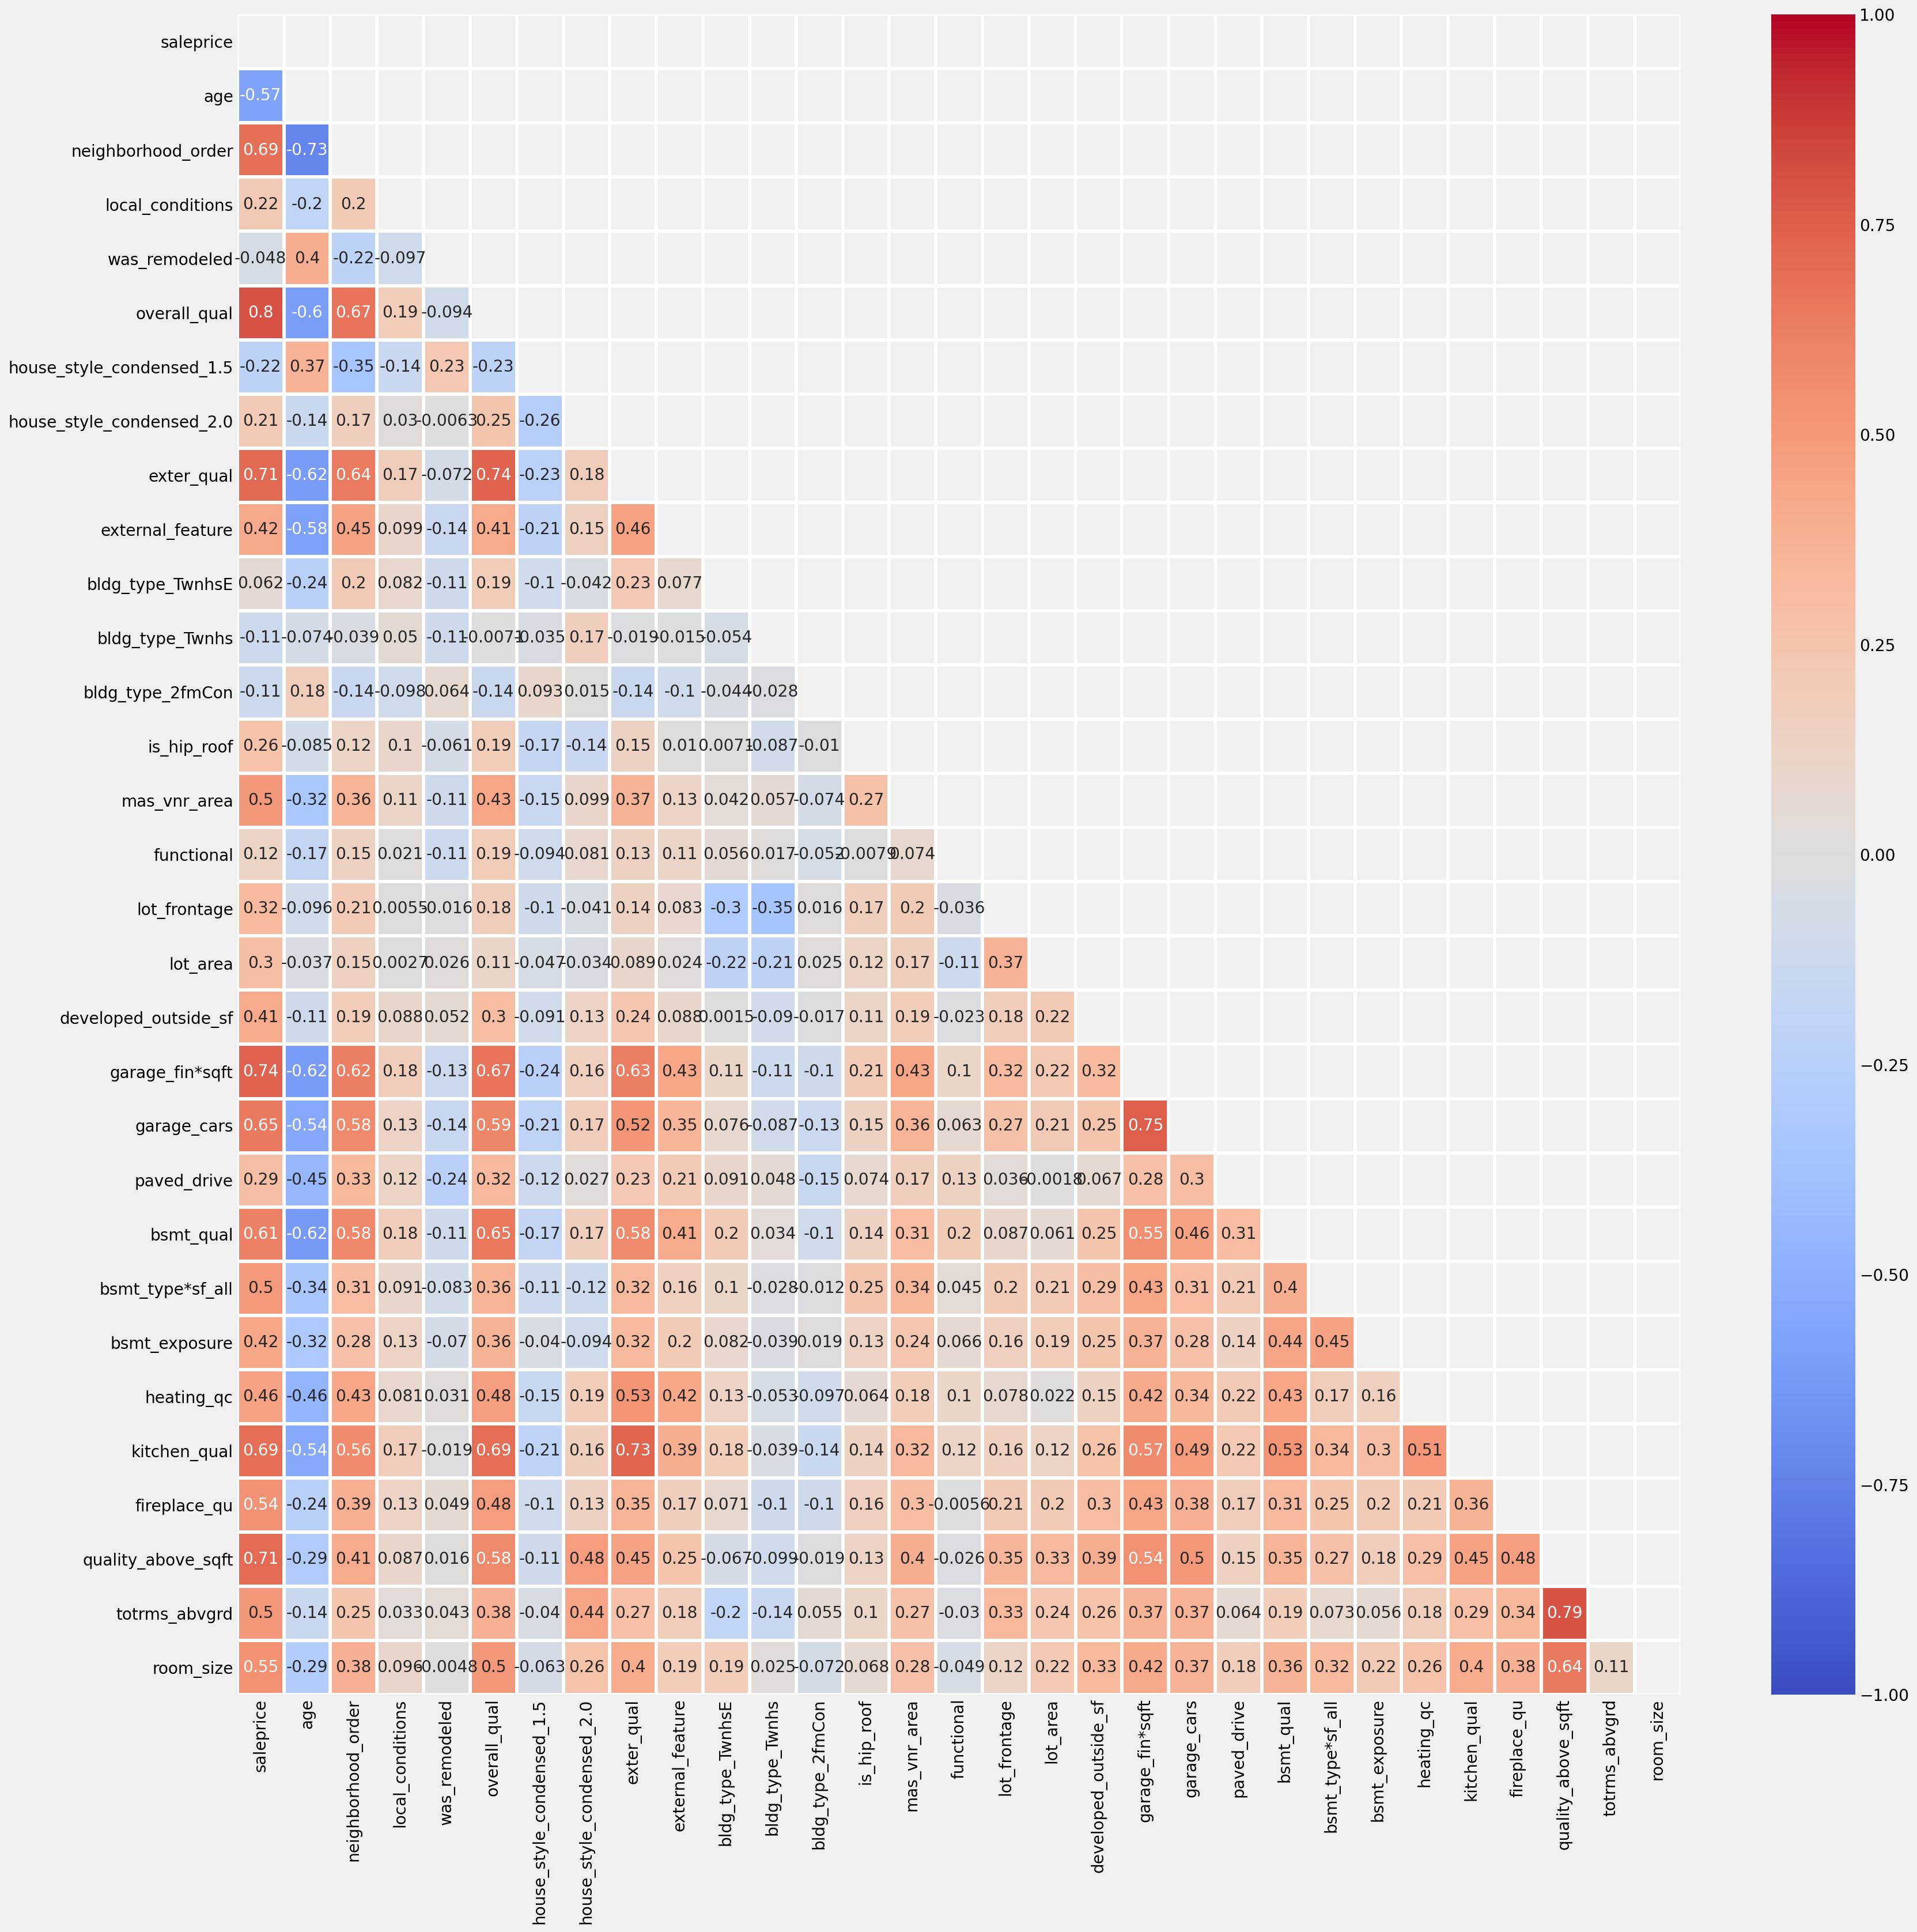

In [153]:
ames_eval =  ames[['saleprice','age','neighborhood_order','local_conditions','was_remodeled','overall_qual', 
                  'house_style_condensed_1.5', 'house_style_condensed_2.0','exter_qual','external_feature',
                  'bldg_type_TwnhsE','bldg_type_Twnhs','bldg_type_2fmCon', 'is_hip_roof','mas_vnr_area',  
                  'functional', 'lot_frontage', 'lot_area','developed_outside_sf'
                  ,'garage_fin*sqft','garage_cars', 'paved_drive',
                 'bsmt_qual','bsmt_type*sf_all', 'bsmt_exposure',
                 'heating_qc','kitchen_qual', 'fireplace_qu', 
                 'quality_above_sqft', 'totrms_abvgrd', 'room_size']]

mask = np.zeros_like(ames_eval.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,25))
sns.heatmap(ames_eval.corr(),
            cmap='coolwarm',
            annot=True,
            mask=mask,
            linewidths=2.5,
            vmin=-1,
            vmax=1,
                
);

In [154]:
ames.shape

(2051, 108)

In [155]:
ames.describe()

id           pid  ms_subclass  lot_frontage       lot_area  \
count  2051.000000  2.051000e+03  2051.000000   2051.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     68.844988   10065.208191   
std     843.980841  1.886918e+08    42.824223     21.624350    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     59.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     66.759571    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

         lot_shape    utilities   land_slope  overall_qual  overall_cond  \
count  2051.000000  2051.000000  2051.000000   2051.000000   2051.000000   
mean      3.595807     3.998537     2.856655      6.112140      5.562165   
std       0.566514     0.049365     0.640067      1.426271      1.104497   
min       1.000000     2.000000     0.000000      1.000000      1.000000   
25%       3.000000     4.000000     3.000000      5.000000      5.000000   
50%       4.000000     4.000000     3.000000      6.000000      5.000000   
75%       4.000000     4.000000     3.000000      7.000000      6.000000   
max       4.000000     4.000000     3.000000     10.000000      9.000000   

        year_built  year_remod/add  mas_vnr_area   exter_qual   exter_cond  \
count  2051.000000     2051.000000   2051.000000  2051.000000  2051.000000   
mean   1971.708922     1984.190151     98.626524     3.406143     3.085812   
std      30.177889       21.036250    174.324690     0.587962     0.372792   
min    1872.000000     1950.000000      0.000000     2.000000     1.000000   
25%    1953.500000     1964.500000      0.000000     3.000000     3.000000   
50%    1974.000000     1993.000000      0.000000     3.000000     3.000000   
75%    2001.000000     2004.000000    159.000000     4.000000     3.000000   
max    2010.000000     2010.000000   1600.000000     5.000000     5.000000   

         bsmt_qual    bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  \
count  2051.000000  2051.000000    2051.000000     2051.000000   2051.000000   
mean      3.490005     2.929303       1.628961        3.564603    442.084837   
std       0.901637     0.572009       1.079440        2.125592    461.195041   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%       3.000000     3.000000       1.000000        1.000000      0.000000   
50%       4.000000     3.000000       1.000000        4.000000    368.000000   
75%       4.000000     3.000000       2.000000        6.000000    733.500000   
max       5.000000     5.000000       4.000000        6.000000   5644.000000   

       bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf   heating_qc  \
count     2051.000000   2051.000000  2051.000000    2051.000000  2051.000000   
mean         1.274500     47.935641   567.451487    1057.471965     4.158459   
std          0.949571    164.964052   445.022846     449.908003     0.964112   
min          0.000000      0.000000     0.000000       0.000000     1.000000   
25%          1.000000      0.000000   220.000000     793.000000     3.000000   
50%          1.000000      0.000000   474.000000     994.000000     5.000000   
75%          1.000000      0.000000   811.000000    1318.500000     5.000000   
max          6.000000   1474.000000  2336.000000    6110.000000     5.000000   

        electrical   1st_flr_sf   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
count  2051.000000  2051.000000  2051.000000      2051.000000  2051.000000   
mean      0.910775  1164.488055   329.329108         5.512921  1499.330083   
std       0.285137   396.446923   425.671046        51.068870   500.447829   
min       0.000000   334.000000     0.000000         0.000000   334.000000   
25%       1.000000   879.500000     0.000000         0.000000  1129.000000   
50%       1.000

### DROP Outliers

In [156]:
ames['saleprice'].describe().T

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [157]:
ames['saleprice'].sort_values().tail(20)

332     460000
41      465000
1117    466500
685     468000
1158    475000
1035    475000
1700    485000
1227    500000
800     500067
81      501837
1592    535000
823     538000
138     545224
623     552000
1164    555000
151     556581
1796    582933
1692    584500
1964    591587
1671    611657
Name: saleprice, dtype: int64

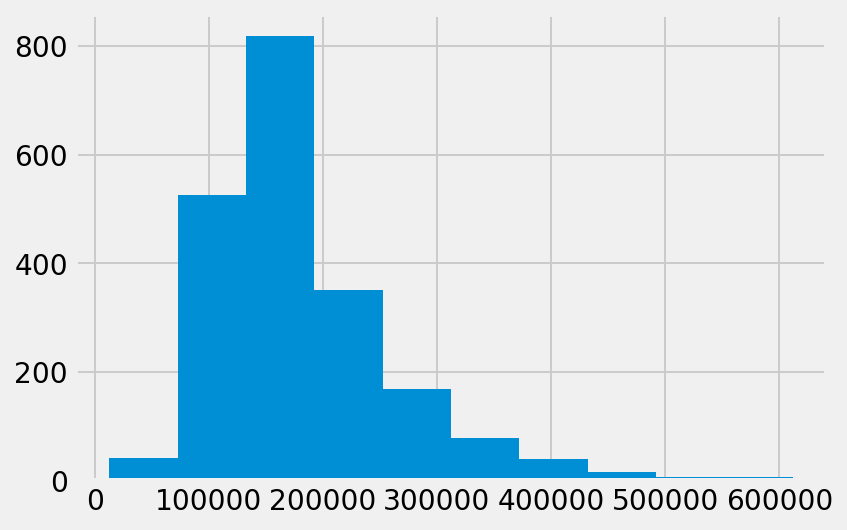

In [158]:
#there are definite outliers. 
ames['saleprice'].hist();

In [159]:
#3 stdevs from the mean 
print(f'Four + stdevs from mean {(79258.659352*4)+181469.701609}. Where max is 611657.000000' )
print(f'Three - stdevs from mean {(-79258.659352*3)+181469.701609}. Where min is 12789.000000')

Four + stdevs from mean 498504.33901700005. Where max is 611657.000000
Three - stdevs from mean -56306.27644700001. Where min is 12789.000000


In [160]:
ames[(ames['saleprice'] > 498504.33901700005)] #13 houses 4 stdevs from the mean. Remove as outliers.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
81     367  527214050           20        RL          63.0     17423   Pave   
138   2331  527210040           60        RL          60.0     18062   Pave   
151   2333  527212030           60        RL          85.0     16056   Pave   
623    457  528176030           20        RL         100.0     14836   Pave   
800   1702  528118050           20        RL          59.0     17169   Pave   
823     16  527216070           60        RL          47.0     53504   Pave   
1164   424  528106020           20        RL         105.0     15431   Pave   
1227    47  528176010           20        RL         110.0     14300   Pave   
1592  2335  527214060           60        RL          82.0     16052   Pave   
1671    45  528150070           20        RL         100.0     12919   Pave   
1692  2451  528360050           60        RL         114.0     17242   Pave   
1796   434  528110090           60        RL         107.0     13891   Pave   
1964  1638  527216080           20        RL          52.0     51974   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
81      NA          3          Lvl          4    CulDSac           3   
138     NA          3          HLS          4    CulDSac           3   
151     NA          3          Lvl          4     Inside           3   
623     NA          3          HLS          4     Inside           0   
800     NA          2          Lvl          4    CulDSac           3   
823     NA          2          HLS          4    CulDSac           0   
1164    NA          4          Lvl          4     Inside           3   
1227    NA          4          HLS          4     Inside           0   
1592    NA          3          Lvl          4    CulDSac           3   
1671    NA          3          Lvl          4     Inside           3   
1692    NA          3          Lvl          4     Inside           3   
1796    NA          4          Lvl          4     Inside           3   
1964    NA          3          Lvl          4    CulDSac           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
81        StoneBr        Norm        Norm      1Story             9   
138       StoneBr        Norm        Norm      2Story            10   
151       StoneBr        Norm        Norm      2Story             9   
623       NridgHt        Norm        Norm      1Story            10   
800       NridgHt        Norm        Norm      1Story            10   
823       StoneBr        Norm        Norm      2Story             8   
1164      NridgHt        Norm        Norm      1Story            10   
1227      NridgHt        Norm        Norm      1Story             9   
1592      StoneBr        Norm        Norm      2Story            10   
1671      NridgHt        Norm        Norm      1Story             9   
1692      NoRidge        Norm        Norm      2Story             9   
1796      NridgHt        Norm        Norm      2Story             9   
1964      StoneBr        PosN        Norm      1Story             9   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
81               5        2008            2009        Hip   CompShg   
138              5        2006            2006        Hip   CompShg   
151              5        2005            2006        Hip   CompShg   
623              5        2004            2005        Hip   CompShg   
800              5        2007            2007        Hip   CompShg   
823              5        2003            2003        Hip   CompShg   
1164             5        2008            2008        Hip   CompShg   
1227             5        2003            2004        Hip   CompShg   
1592             5        2006            2006        Hip   CompShg   
1671             5        2009            2010        Hip   CompShg   
1692             5        1993            1994        Hip   CompShg   
1796             5        2008            200

In [161]:
#dropping houses with prices > 4stdevs from average. There are no houses with <3 stdevs from average
ames = ames[(ames['saleprice'] < 498504.33901700005)]

In [162]:
ames[(ames['year_built']<1899) & (ames['saleprice']>290000)]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1035  2667  902400110           75        RM          90.0     22950   Pave   
1141  1321  902401120           75        RM          75.0     13500   Pave   
1939  1307  902207220           75        RM          87.0     18386   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
1035    NA          2          Lvl          4     Inside           3   
1141    NA          4          Lvl          4     Inside           3   
1939    NA          4          Lvl          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
1035      OldTown      Artery        Norm      2.5Fin            10   
1141      OldTown      Artery        PosA      2.5Unf            10   
1939      OldTown        Norm        Norm      2.5Fin             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1035             9        1892            1993      Gable   WdShngl   
1141             9        1893            2000      Gable   CompShg   
1939             9        1880            2002      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
1035      Wd Sdng      Wd Sdng         None           0.0           4   
1141      Wd Sdng      Wd Sdng         None           0.0           5   
1939      CemntBd      CmentBd         None           0.0           3   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
1035           4     BrkTil          3          3              2   
1141           5     BrkTil          3          3              1   
1939           3     BrkTil          3          3              1   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
1035               1           0.0               1           0.0       1107.0   
1141               1           0.0               1           0.0       1237.0   
1939               1           0.0               1           0.0       1470.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
1035         1107.0    GasA           5           Y           1        1518   
1141         1237.0    GasA           4           Y           1        1521   
1939         1470.0    GasA           5           Y           1        1675   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
1035        1518              572         3608             0.0   
1141        1254                0         2775             0.0   
1939        1818                0         3493             0.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
1035             0.0          2          1              4              1   
1141             0.0          3          1              3              1   
1939             0.0          3          0              3              1   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
1035             5             12           1           2             3   
1141             4              9           1           1             4   
1939             4             10           1           1             5   

     garage_type  garage_yr_blt  garage_finish  garage_cars  garage_area  \
1035      Detchd         1993.0              1          3.0        840.0   
1141      Detchd         1988.0              1          2.0        880.0   
1939      Attchd         2003.0              1          3.0        870.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
1035            5            3            2             0            260   
1141            4            3            2           105            502   
1939            3            3            2           302              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
1035               0           0           410          0        0

In [163]:
#drop these so age works as a predictor of sales price. Are these historic houses?
ames = ames[ames['id'] != 2667]
ames = ames[ames['id'] != 1321]
ames = ames[ames['id'] != 1307]

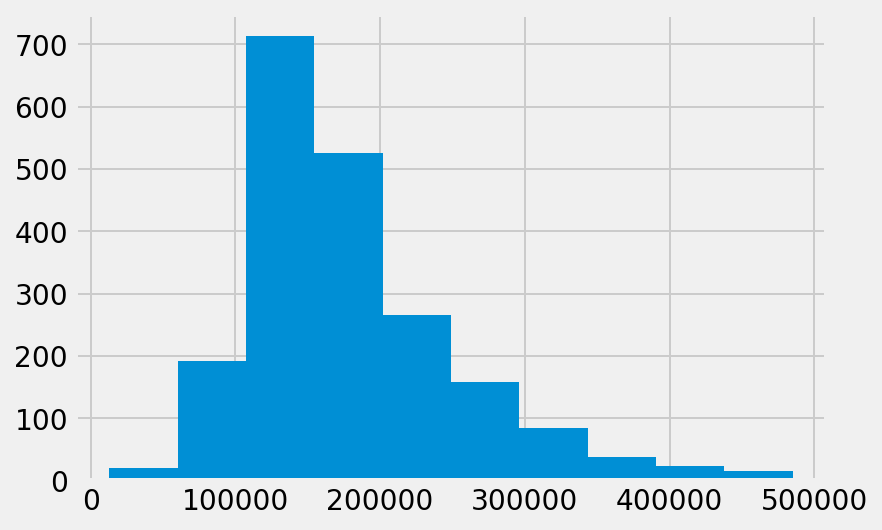

In [164]:
ames['saleprice'].hist();

In [165]:
ames[ames['id'].isin([1499, 2181])]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     alley  lot_shape land_contour  utilities lot_config  land_slope  \
960     NA          1          Bnk          4     Corner           3   
1885    NA          3          Bnk          4     Inside           3   

     neighborhood condition_1 condition_2 house_style  overall_qual  \
960       Edwards       Feedr        Norm      2Story            10   
1885      Edwards        Norm        Norm      1Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
960              5        2008            2008        Hip   ClyTile   
1885             5        2008            2009        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  \
960        Stucco       Stucco        Stone         796.0           5   
1885      CemntBd      CmentBd        Stone        1224.0           5   

      exter_cond foundation  bsmt_qual  bsmt_cond  bsmt_exposure  \
960            3      PConc          5          3              4   
1885           3      PConc          5          3              4   

      bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  \
960                6        5644.0               1           0.0        466.0   
1885               6        4010.0               1           0.0       1085.0   

      total_bsmt_sf heating  heating_qc central_air  electrical  1st_flr_sf  \
960          6110.0    GasA           5           Y           1        4692   
1885         5095.0    GasA           5           Y           1        5095   

      2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
960          950                0         5642             2.0   
1885           0                0         5095             1.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
960              0.0          2          1              3              1   
1885             1.0          2          1              2              1   

      kitchen_qual  totrms_abvgrd  functional  fireplaces  fireplace_qu  \
960              5             12           1           3             4   
1885             5             15           1           2             4   

     garage_type  garage_yr_blt  garage_finish  garage_cars  garage_area  \
960       Attchd         2008.0              3          2.0       1418.0   
1885      Attchd         2008.0              3          3.0       1154.0   

      garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
960             3            3            2           214            292   
1885            3            3            2           546            484   

      enclosed_porch  3ssn_porch  screen_porch  pool_area  pool_qc  fence  \
960                0           0             0        480        4      0   
1885               0           0             0          0        0      0   

     misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice  \
960            NA         0        1     2008       New     160000   
1885         Elev     17000       10     2007       New     183850   

      neighborhood_order  sale_type_order  basement_overall  bsmt_type*sf_all  \
960                    1                3                20           33864.0   
1885                   1                3                20           24060.0   

      garage_fin*sqft  quality_above_sqft  bsmt_baths  above_baths  all_baths  \
960            4254.0                5642         2.0          2.5        4.5   
1885           3462.0                5095         1.5          2.5        4.0   

       room_size  developed_outside_sf  mas_vnr_type_dummy  age  \
960   470.166667                   506                   1    0   
1885  339.666667                  1030   

In [166]:
#dropping sqft outliers for basement/frontage/first floor
ames = ames[ames['id'] != 1499]
ames = ames[ames['id'] != 2181]

#### Copy cleaned dataset for use in model training

In [167]:
ames_eval.shape

(2051, 31)

In [168]:
ames_eval = ames[['saleprice','age','neighborhood_order','local_conditions','was_remodeled','overall_qual', 
                  'house_style_condensed_1.5', 'house_style_condensed_2.0','exter_qual','external_feature',
                  'bldg_type_TwnhsE','bldg_type_Twnhs','bldg_type_2fmCon', 'is_hip_roof','mas_vnr_area',  
                  'functional', 'lot_frontage', 'lot_area','developed_outside_sf'
                  ,'garage_fin*sqft','garage_cars', 'paved_drive',
                 'bsmt_qual','bsmt_type*sf_all', 'bsmt_exposure',
                 'heating_qc','kitchen_qual', 'fireplace_qu', 
                 'quality_above_sqft', 'totrms_abvgrd', 'room_size']]

In [169]:
ames_eval.shape #In total, I drop 18 outliers.

(2033, 31)

In [170]:
#copy cleaned dataset to the datasets folder where the next and much more exciting step of the process begins, go to 2_Model_Evaluation for the model score results. This was a back
#forth process. This is just the final iteration in a large number of iterations.
ames_eval.to_csv('../datasets/ames_train_clean.csv', index = False)

In [171]:
#summary stats on the model variables
ames_eval[['saleprice', 'age', 'neighborhood_order', 'local_conditions',
       'was_remodeled', 'overall_qual', 'house_style_condensed_1.5',
       'house_style_condensed_2.0', 'exter_qual', 'external_feature',
       'bldg_type_TwnhsE', 'bldg_type_Twnhs', 'bldg_type_2fmCon',
       'is_hip_roof', 'mas_vnr_area', 'functional', 'lot_frontage', 'lot_area',
       'developed_outside_sf', 'garage_fin*sqft', 'garage_cars', 'paved_drive',
       'bsmt_qual', 'bsmt_type*sf_all', 'bsmt_exposure', 'heating_qc',
       'kitchen_qual', 'fireplace_qu', 'quality_above_sqft', 'totrms_abvgrd',
       'room_size']].describe().T

count           mean           std      min  \
saleprice                  2033.0  178849.543532  73440.103247  12789.0   
age                        2033.0      36.192327     30.035427      0.0   
neighborhood_order         2033.0       2.378259      1.064855      1.0   
local_conditions           2033.0       1.892277      0.403850      0.0   
was_remodeled              2033.0       0.460895      0.498591      0.0   
overall_qual               2033.0       6.083620      1.397725      1.0   
house_style_condensed_1.5  2033.0       0.137727      0.344699      0.0   
house_style_condensed_2.0  2033.0       0.299065      0.457961      0.0   
exter_qual                 2033.0       3.394491      0.574909      2.0   
external_feature           2033.0       7.749139      2.032955      2.0   
bldg_type_TwnhsE           2033.0       0.079193      0.270107      0.0   
bldg_type_Twnhs            2033.0       0.033940      0.181119      0.0   
bldg_type_2fmCon           2033.0       0.022627      0.148747      0.0   
is_hip_roof                2033.0       0.195770      0.396890      0.0   
mas_vnr_area               2033.0      94.284801    165.387579      0.0   
functional                 2033.0       0.933596      0.249049      0.0   
lot_frontage               2033.0      68.580457     20.865808     21.0   
lot_area                   2033.0    9939.434333   6472.912858   1300.0   
developed_outside_sf       2033.0     180.685686    156.400223      0.0   
garage_fin*sqft            2033.0     902.987703    652.070693      0.0   
garage_cars                2033.0       1.765863      0.760928      0.0   
paved_drive                2033.0       1.832268      0.536926      0.0   
bsmt_qual                  2033.0       3.480079      0.896582      0.0   
bsmt_type*sf_all           2033.0    2387.641417   2505.929101      0.0   
bsmt_exposure              2033.0       1.616331      1.069609      0.0   
heating_qc                 2033.0       4.151500      0.965278      1.0   
kitchen_qual               2033.0       3.505657      0.655903      2.0   
fireplace_qu               2033.0       1.743237      1.801406      0.0   
quality_above_sqft         2033.0    1474.505657    472.290935    249.0   
totrms_abvgrd              2033.0       6.400394      1.510801      2.0   
room_size                  2033.0     231.192394     44.747013    120.0   

                                     25%            50%            75%  \
saleprice                  129500.000000  161000.000000  213000.000000   
age                             7.000000      34.000000      54.000000   
neighborhood_order              1.000000       2.000000       3.000000   
local_conditions                2.000000       2.000000       2.000000   
was_remodeled                   0.000000       0.000000       1.000000   
overall_qual                    5.000000       6.000000       7.000000   
house_style_condensed_1.5       0.000000       0.000000       0.000000   
house_style_condensed_2.0       0.000000       0.000000       1.000000   
exter_qual                      3.000000       3.000000       4.000000   
external_feature                6.000000       7.000000      10.000000   
bldg_type_TwnhsE                0.000000       0.000000       0.000000   
bldg_type_Twnhs                 0.000000       0.000000       0.000000   
bldg_type_2fmCon                0.000000       0.000000       0.000000   
is_hip_roof                     0.000000       0.000000       0.000000   
mas_vnr_area                    0.000000       0.000000     150.000000   
functional                      1.000000       1.000000       1.000000   
lot_frontage                   59.000000      66.759571      80.000000   
lot_area                     7500.000000    9373.000000   11428.000000   
developed_outside_sf           48.000000     163.000000     266.000000   
garage_fin*sqft               384.000000     768.000000    1302.000000   
garage_cars                     1.000000       2.000000       2.000000   